## Problem Statement

Retinal diseases pose a substantial global health challenge, with conditions such as Diabetic Retinopathy (DR), Macular Hole (MH), Optic Disc Cupping (ODC), among others, contributing significantly to vision impairment and blindness if they are not diagnosed and treated promptly. Diabetic Retinopathy, for example, is a complication of diabetes that affects the blood vessels of the retina, leading to progressive vision loss. Macular Hole involves a small break in the macula, the central part of the retina responsible for sharp vision, causing blurred and distorted vision. Optic Disc Cupping, often associated with glaucoma, involves the deformation of the optic disc and can lead to irreversible vision loss.

The current practice of diagnosing these conditions relies heavily on manual analysis of retinal images by ophthalmologists and other medical experts. This process is not only labor-intensive but also prone to human error, which can result in misdiagnosis or delayed diagnosis. Furthermore, it requires a high level of specialized medical knowledge and expertise, making it difficult to manage the high volume of cases in areas with limited healthcare resources.

Given these challenges, there is an urgent need for automated systems that can accurately and efficiently detect and classify retinal diseases from retinal images. Such systems can significantly aid healthcare professionals by providing reliable preliminary diagnoses, thus speeding up the decision-making process and ensuring timely treatment. Automation in this field can help reduce the workload on medical experts, minimize the risk of human error, and make specialized care more accessible, especially in remote or underserved regions. Therefore, developing robust and precise deep learning models for the classification of retinal diseases is essential to improving patient outcomes and addressing this critical health issue.

### Objective

The objectiveis to develop a robust and accurate deep learning model that can automatically classify retinal images into distinct categories.

### Data Dictionary

- Diabetic Retinopathy (DR)
- Macular Hole (MH),
- Optic Disc Cupping (ODC)
- Normal
- Diabetic Neuropathy(DN)

## Importing necessary libraries

In [1]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
import zipfile
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Retinal Disease Classification/Dataset.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
picture_size = 224
folder_path = "/content/Dataset/"

## Exploratory Data Analysis

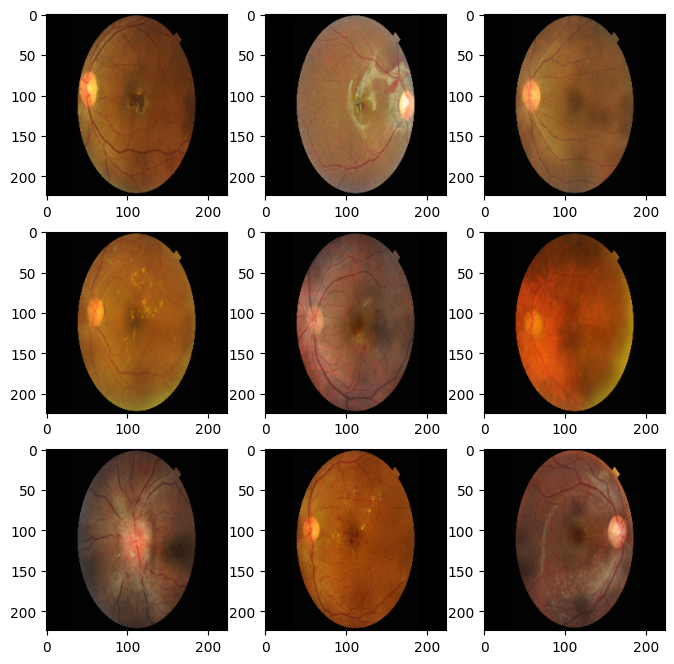

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
classes = 'Normal'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "Train/" + classes + "/" +
                  os.listdir(folder_path + "Train/" + classes)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Normal**:

- Images classified as 'Normal' typically show no signs of retinal disease or abnormalities.
- These images serve as a baseline for comparison with diseased retinas.

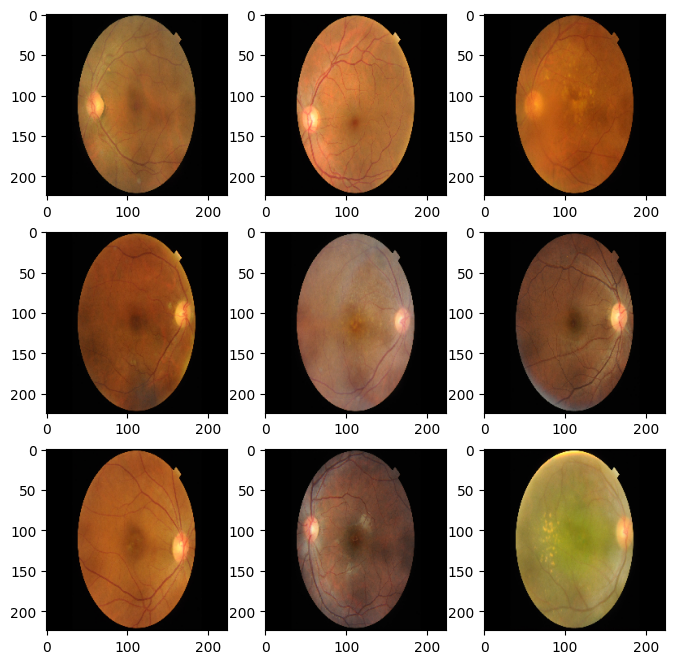

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
classes = 'DN'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "Train/" + classes + "/" +
                  os.listdir(folder_path + "Train/" + classes)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**DN (Diabetic Neuropathy)**:

- DN is a common complication of diabetes that affects the nerves, including those in the retina.
- Patients with DN often show signs of retinal damage such as microaneurysms, hemorrhages, and lipid deposits.
- Early detection through retinal imaging can help in timely intervention and management of diabetic neuropathy.

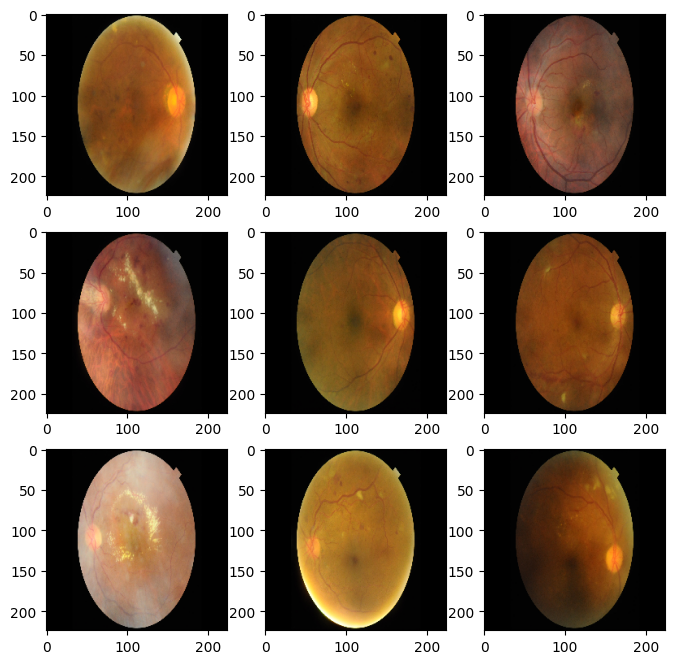

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
classes = 'DR'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "Train/" + classes + "/" +
                  os.listdir(folder_path + "Train/" + classes)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**DR (Diabetic Retinopathy)**:

- DR is another common complication of diabetes affecting the blood vessels in the retina.
- It is characterized by changes in the blood vessels, including microaneurysms, hemorrhages, and exudates.
- The severity of DR can range from mild nonproliferative stages to severe proliferative stages that can lead to vision loss if untreated.

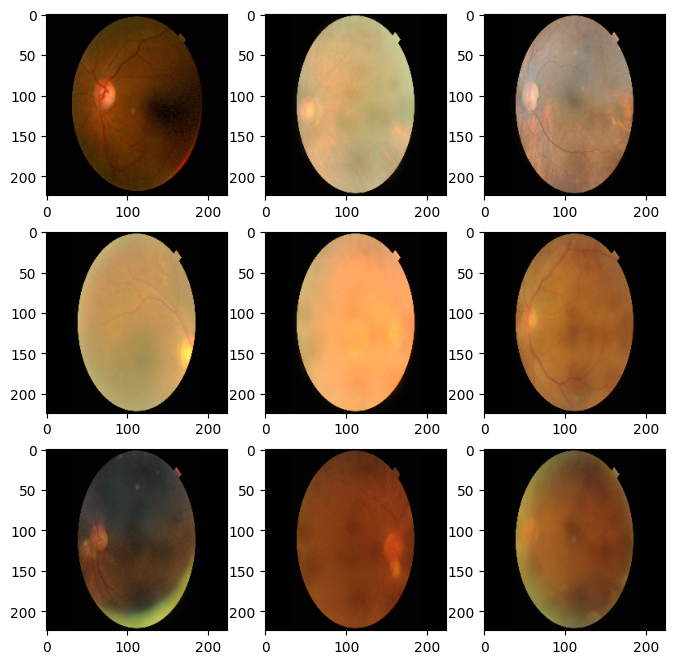

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
classes = 'MH'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "Train/" + classes + "/" +
                  os.listdir(folder_path + "Train/" + classes)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**MH (Macular Hole)**:

- MH is a condition where there is a small break or hole in the macula, the central part of the retina responsible for sharp, central vision.
- Symptoms include blurred or distorted central vision, and in advanced stages, a dark spot in the center of vision.
- Surgical intervention may be required to repair larger macular holes and restore vision.

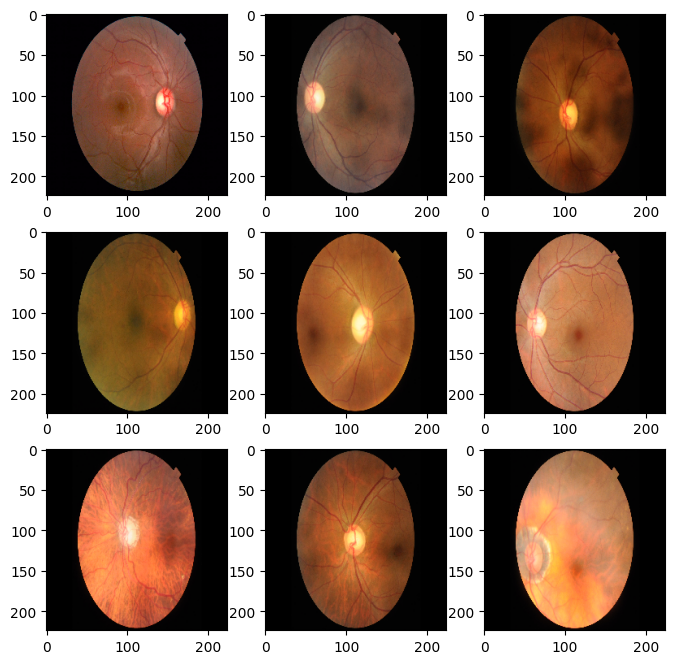

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
classes = 'ODC'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "Train/" + classes + "/" +
                  os.listdir(folder_path + "Train/" + classes)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**ODC (Other Retinal Diseases)**:

- ODC encompasses a variety of less common retinal diseases that do not fall into the specific categories like DR or MH.
- Examples may include retinal dystrophies, vascular occlusions, or inflammatory conditions affecting the retina.
- Each of these conditions may have distinct features visible in retinal imaging, guiding specific diagnosis and treatment.

In [ ]:
# Getting count of images in each folder within our training path
num_normal = len(os.listdir(folder_path + "Train/Normal"))
print("Number of images in the class 'Normal':   ", num_normal)

num_DN  = len(os.listdir(folder_path + "Train/DN"))
print("Number of images in the class 'DN':   ", num_DN)

num_DR  = len(os.listdir(folder_path + "Train/DR"))
print("Number of images in the class 'DR':   ", num_DR)

num_MH = len(os.listdir(folder_path + "Train/MH"))
print("Number of images in the class 'MH':   ", num_MH)

num_ODC = len(os.listdir(folder_path + "Train/ODC"))
print("Number of images in the class 'ODC':   ", num_ODC)

Number of images in the class 'Normal':    132
Number of images in the class 'DN':    132
Number of images in the class 'DR':    132
Number of images in the class 'MH':    132
Number of images in the class 'ODC':    132


In the dataset for Retinal Disease Classification, each class—'Normal', 'DN', 'DR', 'MH', and 'ODC'—contains an equal number of 132 images. The uniformity in sample size across classes enhances the reliability of model predictions by reducing the risk of bias towards any particular category. This dataset structure supports comprehensive analysis and classification of various retinal diseases, aiming to improve diagnostic accuracy and patient care through automated image-based assessments.

## Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory paths for the entire dataset
data_directory = '/content/Dataset/Train'

# Define data generators for train, validation, and test data
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Set batch size and target image size
batch_size = 32
image_size = (224, 224)

# Load and preprocess data with validation split
train_data_generator = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use 'training' for the training data
)
# Extract true labels for the training data
num_samples = len(train_data_generator)
batch_index = 0
true_labels = []

while batch_index < num_samples:
    data, labels = train_data_generator[batch_index]
    true_labels.extend(labels)
    batch_index += 1

true_labels_train = np.array(true_labels)


validation_data_generator = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use 'validation' for the validation data
)
# Extract true labels for the training data
num_samples = len(validation_data_generator)
batch_index = 0
true_labels = []

while batch_index < num_samples:
    data, labels = validation_data_generator[batch_index]
    true_labels.extend(labels)
    batch_index += 1

true_labels_val = np.array(true_labels)


# Define the directory path for test data
test_directory = '/content/Dataset/Test'

# Define a data generator for test data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_data_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # You can set this to 'categorical' if you have multiple classes
)

# Extract true labels for the training data
num_samples = len(test_data_generator)
batch_index = 0
true_labels = []

while batch_index < num_samples:
    data, labels = test_data_generator[batch_index]
    true_labels.extend(labels)
    batch_index += 1

true_labels_test = np.array(true_labels)

Found 530 images belonging to 5 classes.
Found 130 images belonging to 5 classes.
Found 195 images belonging to 5 classes.


### HSV Images

**What is HSV?**

HSV stands for Hue, Saturation, and Value (or Brightness). It's a color space that represents colors in a way that is often more intuitive and perceptually meaningful than the more common RGB (Red, Green, Blue) color space. HSV is particularly useful for various computer vision tasks, image processing, and computer graphics. Here's an overview of each component in the HSV color space:

- Hue (H): The hue component represents the type of color, such as red, green, blue, yellow, etc. It is measured in degrees, typically ranging from 0 to 360, where 0 and 360 both correspond to red. Hue provides information about the dominant wavelength of light that gives the color its distinct identity.

- Saturation (S): Saturation refers to the purity or vividness of the color. A high saturation value means the color is more pure, while a low saturation value results in a more washed-out or grayish appearance. Saturation is usually represented as a percentage, ranging from 0% (completely unsaturated or grayscale) to 100% (fully saturated).

- Value (V): Value represents the brightness or intensity of the color. A higher value indicates a brighter color, while a lower value results in a darker color. Value is typically represented on a scale from 0 to 100 or 0 to 1.

The HSV color space is often preferred over RGB for certain computer vision tasks and image processing operations because it separates color information (hue and saturation) from brightness information (value). This separation makes it easier to manipulate and analyze color properties independently. Some common use cases for the HSV color space in computer vision include:

  - Object Tracking: HSV can be used to identify and track objects based on their color, making it more robust to lighting changes.
  - Color-Based Image Segmentation: HSV is used for segmenting regions of interest in images based on specific colors.
  - Image Enhancement: Adjusting the saturation and value components can enhance or manipulate the colors in an image.
  - Color Recognition: HSV is used for recognizing and classifying objects or regions based on their colors.
  - Image Thresholding: HSV thresholding is commonly used to separate objects of interest from the background in color images.
  
HSV is a powerful tool for working with color information in computer vision and is especially useful when you need to focus on the perceptual attributes of color rather than the raw pixel values.

**Why it is used?**

The HSV color space is used in computer vision and image processing for various reasons, as it offers several advantages over other color representations like RGB. Here are some key reasons for using the HSV color space:

- Intuitive Color Description: HSV provides a more intuitive way to describe and manipulate colors. Hue represents the perceived color, saturation controls the vividness or purity of the color, and value represents the brightness. This separation makes it easier to work with color attributes individually.

- Color Invariance: HSV is less sensitive to changes in lighting conditions compared to RGB. It can be particularly useful when working with images captured under varying lighting conditions. This invariance to lighting changes can improve the performance of color-based computer vision algorithms.

- Color-Based Object Detection: When you need to identify or track objects in an image based on their color, the HSV color space is a better choice. It simplifies the task of specifying the desired color or color range for object detection.

- Segmentation: HSV is often used for segmenting images into different regions or objects based on their colors. This is valuable for tasks like image analysis, object recognition, and medical image processing.

- Image Enhancement: You can use HSV to enhance or manipulate the color in an image. Adjusting the saturation or value allows you to make colors more vibrant, desaturate them, or adjust the overall brightness.

- Thresholding: HSV thresholding simplifies the process of isolating objects or regions of interest in an image based on their color characteristics. This can be helpful for tasks like background removal or feature extraction.

Color Recognition: When you need to recognize specific colors in images, HSV is a valuable tool. It simplifies color-based recognition and classification tasks.

In [ ]:
import numpy as np
import tensorflow as tf

def convert_to_hsv_batch(image_batch):
    # Convert the batch of images to the HSV color space
    hsv_batch = [tf.image.rgb_to_hsv(image) for image in image_batch]
    return tf.convert_to_tensor(hsv_batch)

# Convert training data to HSV
train_data_generator_hsv = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
).flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

train_data_generator_hsv_converted = (
    (convert_to_hsv_batch(images), labels)
    for images, labels in train_data_generator_hsv
)

# Convert validation data to HSV
validation_data_generator_hsv = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
).flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

validation_data_generator_hsv_converted = (
    (convert_to_hsv_batch(images), labels)
    for images, labels in validation_data_generator_hsv
)

# Convert test data to HSV
test_data_generator_hsv = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(
    test_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_data_generator_hsv_converted = (
    (convert_to_hsv_batch(images), labels)
    for images, labels in test_data_generator_hsv
)

Found 530 images belonging to 5 classes.
Found 130 images belonging to 5 classes.
Found 195 images belonging to 5 classes.


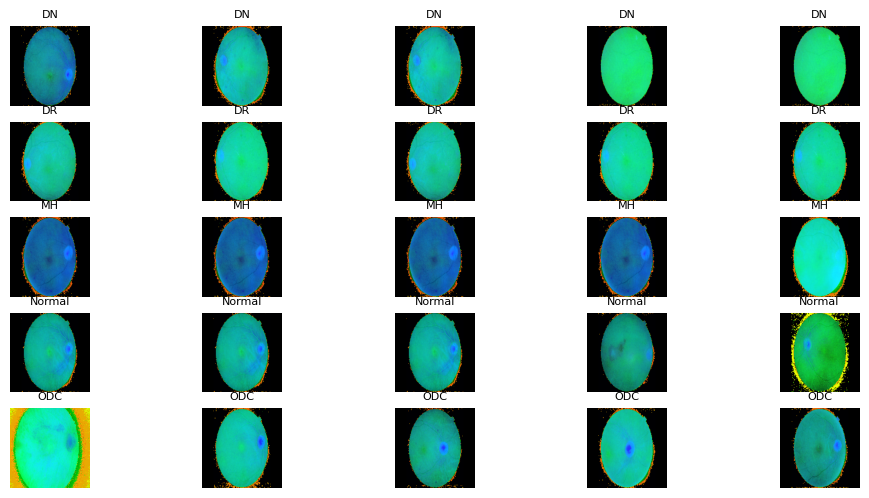

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot HSV images from a batch
def plot_hsv_images_from_batch(batch, class_names, num_images=5):
    for class_idx, class_name in enumerate(class_names):
        # Get a batch of images and labels
        images, labels = next(batch)

        # Find the indices of images belonging to the current class
        class_indices = np.where(labels == class_idx)[0]

        # Randomly select 'num_images' images from the current class
        selected_indices = np.random.choice(class_indices, num_images)

        for i, idx in enumerate(selected_indices):
            plt.subplot(len(class_names), num_images, class_idx * num_images + i + 1)
            plt.imshow(images[idx])
            plt.title(class_name,fontsize=8)
            plt.axis('off')

# Define class names
class_names = ['DN', 'DR','MH','Normal','ODC']

# Plot HSV images from the training data
plt.figure(figsize=(12, 6))
plot_hsv_images_from_batch(train_data_generator_hsv_converted, class_names)  # Use the converted data
plt.show()

**Observations**

- In our visual analysis, we observe a specific image processing step where the original images are transformed into the HSV (Hue, Saturation, and Value) color space. This conversion represents a significant change in color representation, potentially revealing new insights and relationships within the images. It's a crucial preprocessing step that can influence how we perceive and analyze the images, uncovering patterns that may not have been apparent in the original color scheme.

- Despite converting to the HSV format, the visual appearance of the images appears consistent with the original data. No additional details, features, or patterns are visibly uncovered as a result of this transformation. This suggests that the HSV format may not offer a substantial advantage in terms of information gain or improved distinction within the specific dataset and analytical goals.

- Based on these observations and the apparent lack of additional information post-HSV conversion, we conclude that this transformation may not significantly benefit our model-building objectives. This realization is critical as it informs decisions about which preprocessing steps to retain and which to discard, guiding us towards more effective feature engineering and model development strategies.

### Gaussian Blur

**What is Gaussian Blur?**

Gaussian blur represents a prevalent image-blurring filter utilized across numerous image processing and computer vision applications. Named after the Gaussian function, which defines a symmetrical, bell-shaped curve, this technique is instrumental in reducing image noise and smoothing fine details while preserving overall structure and edges.

Here’s how Gaussian blur operates:

Convolution Process: Gaussian blur is typically implemented through a convolution operation on an image. This involves passing a filter, known as a Gaussian kernel, over the image to compute the weighted average of pixel values within a local neighborhood. The outcome is a new image where each pixel reflects a weighted average of its neighboring pixels.

- Kernel Shape: The Gaussian kernel used in convolution is a two-dimensional matrix with a central pixel holding the highest weight (typically 1), and weights diminish as distance from the center increases. The kernel’s shape adheres to a Gaussian distribution, hence its name.

- Blur Effect: Applying the Gaussian kernel to the image results in effective blurring. The degree of blur is determined by the standard deviation (σ) of the Gaussian distribution: a higher σ yields broader, smoother blurs, while a lower σ produces subtler, narrower blurs.

Gaussian blur finds wide application for:

- Noise Reduction: It significantly reduces random noise in images, enhancing clarity and simplifying analysis.

- Preprocessing: In computer vision tasks, Gaussian blur is frequently employed as a preprocessing step to enhance the accuracy of edge detection, object recognition, and other algorithms.

Gaussian blur is just one of many image-blurring techniques, its efficacy varying with specific applications and image characteristics.

**Why it is used?**

Gaussian blur serves several crucial purposes in image processing and computer vision:

- Noise Reduction: Images frequently contain unwanted variations in pixel values, termed noise, caused by factors like sensor imperfections or compression artifacts. Gaussian blur is utilized to smooth out these variations, resulting in a cleaner image that is easier to handle.

- Edge Detection: A fundamental task in image processing involves detecting edges or boundaries within images. Gaussian blur effectively removes small-scale details and noise, thereby improving the detection of larger-scale edges and features.

- Feature Extraction: In computer vision applications, identifying objects or patterns within images relies heavily on feature extraction. Gaussian blur is commonly applied as a preprocessing step to simplify images and reduce data complexity, thereby enhancing the efficiency of feature extraction processes.

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Define a function to apply Gaussian blur to an image
def apply_gaussian_blur(image):
    # Apply Gaussian blur to the image
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    return blurred_image

# Add the Gaussian blur function to the datagen
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,
    preprocessing_function=apply_gaussian_blur  # Add the Gaussian blur function
)

# Load and preprocess data with validation split
train_data_generator_gaussian = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use 'training' for the training data
)

validation_data_generator_gaussian = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Use 'validation' for the validation data
)

# Define a data generator for test data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Apply Gaussian blur to test data
test_datagen.preprocessing_function = apply_gaussian_blur  # Add the Gaussian blur function
test_data_generator_gaussian = test_datagen.flow_from_directory(
    test_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # You can set this to 'categorical' if you have multiple classes
)

Found 530 images belonging to 5 classes.
Found 130 images belonging to 5 classes.
Found 195 images belonging to 5 classes.


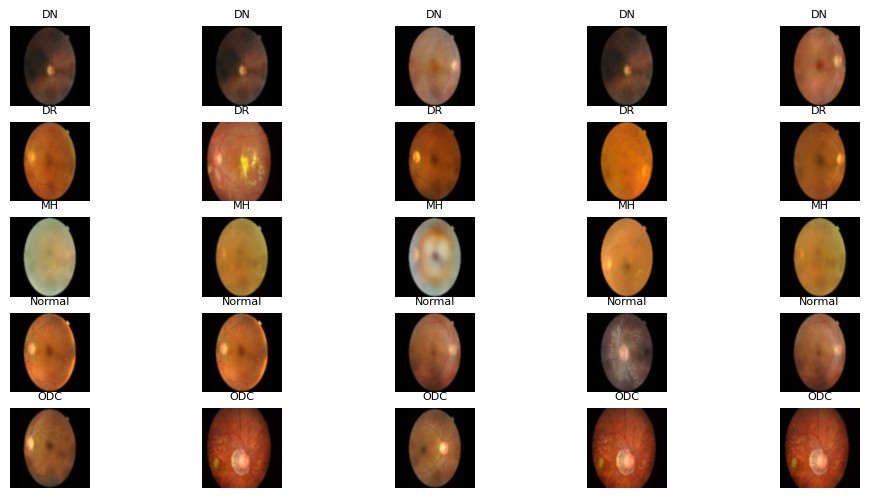

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot Gaussian-blurred images from a batch
def plot_gaussian_blurred_images_from_batch(batch, class_names, num_images=5):
    for class_idx, class_name in enumerate(class_names):
        # Get a batch of images and labels
        images, labels = next(batch)

        # Find the indices of images belonging to the current class
        class_indices = np.where(labels == class_idx)[0]

        # Randomly select 'num_images' images from the current class
        selected_indices = np.random.choice(class_indices, num_images)

        for i, idx in enumerate(selected_indices):
            plt.subplot(len(class_names), num_images, class_idx * num_images + i + 1)
            plt.imshow(images[idx])
            plt.title(class_name,fontsize=8)
            plt.axis('off')

# Define class names
class_names = ['DN', 'DR','MH','Normal','ODC']

# Plot Gaussian-blurred images from the training data
plt.figure(figsize=(12, 6))
plot_gaussian_blurred_images_from_batch(train_data_generator_gaussian, class_names)
plt.show()

**Observations**

- Upon analyzing the plot above, it becomes evident that applying Gaussian blur to the original images results in a noticeable reduction in discernible patterns. Gaussian blur is intended to smooth and simplify visual information, leading to a less detailed and more uniform appearance. Consequently, this blurring process appears to diminish distinct patterns or fine-grained features that might have been more pronounced in the unaltered images.

- Despite the observed reduction in image patterns, it's crucial to note that applying Gaussian blur offers a significant advantage in terms of computational efficiency. By smoothing and simplifying the images, the computational load required for subsequent analysis or modeling is greatly reduced. This means tasks such as feature extraction, classification, or other data-driven operations become less resource-intensive and more streamlined. Therefore, while converting to Gaussian blur may reduce fine-grained patterns, it can enhance the overall efficiency and speed of the data processing and analysis pipeline.

#### Comparision of Original images Vs Blurred images

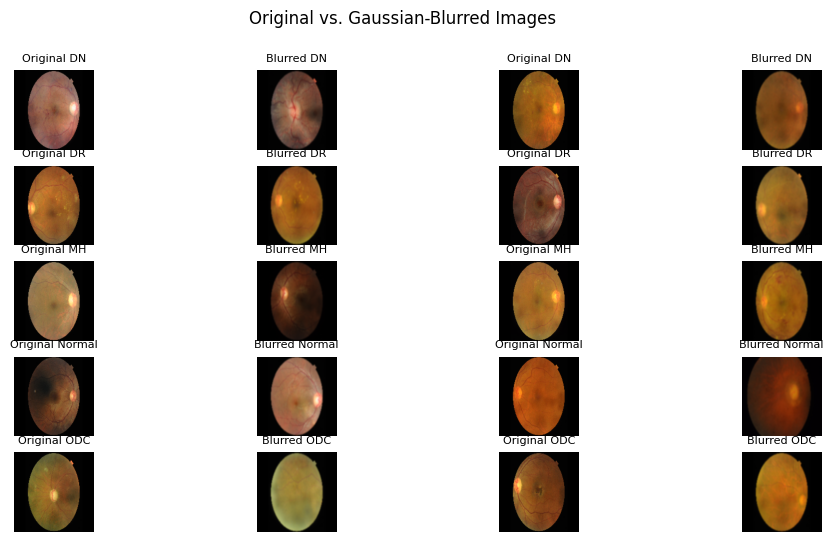

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot original and Gaussian-blurred images side by side
def plot_original_vs_blurred_images(original_generator, blurred_generator, class_names, num_images=2):
    for class_idx, class_name in enumerate(class_names):
        # Get a batch of original images and labels
        original_images, labels = next(original_generator)

        # Find the indices of images belonging to the current class
        class_indices = np.where(labels == class_idx)[0]

        # Randomly select 'num_images' images from the current class
        num_images = min(num_images, len(class_indices))  # Ensure num_images <= available samples
        selected_indices = np.random.choice(class_indices, num_images, replace=False)

        for i, idx in enumerate(selected_indices):
            # Original image
            plt.subplot(len(class_names), 2 * num_images, class_idx * 2 * num_images + i * 2 + 1)
            plt.imshow(original_images[i])
            plt.title('Original ' + class_name,fontsize = 8)
            plt.axis('off')

            # Synchronize and get the same indices from the blurred generator
            for j in range(idx):
                next(blurred_generator)  # Advance to the corresponding index

            # Get the blurred image
            blurred_images, _ = next(blurred_generator)

            # Blurred image
            plt.subplot(len(class_names), 2 * num_images, class_idx * 2 * num_images + i * 2 + 2)
            plt.imshow(blurred_images[0])
            plt.title('Blurred ' + class_name,fontsize = 8)
            plt.axis('off')

# Define class names
class_names = ['DN', 'DR','MH','Normal','ODC']

# Plot original vs. Gaussian-blurred images from the training data
plt.figure(figsize=(12, 6))
plot_original_vs_blurred_images(train_data_generator, train_data_generator_gaussian, class_names)
plt.suptitle('Original vs. Gaussian-Blurred Images')
plt.show()

**Observations**

- Upon reviewing the plot above, we can observe the contrast between the original, unmodified images and those processed with Gaussian blur. This comparison provides a visual understanding of how the blurring process softens and diffuses the fine details and sharp edges present in the original images.

- It's noteworthy that even after applying Gaussian blur, the essential information and key features within the images remain unchanged. While the blurring process reduces fine details and enhances smoothness to some extent, it preserves the fundamental content and structure. This retention of essential information indicates that Gaussian blur maintains the core visual characteristics and patterns, which can be beneficial when reducing minor noise or irrelevant details while preserving the integrity of the primary content.



## Model Building

We initially experimented with building different models using images that had been converted with HSV (Hue, Saturation, Value) and Gaussian blur techniques. However, these preprocessing methods did not yield significant improvements in our results. Consequently, we decided to use the original, unaltered images to develop our models, which led to better performance metrics. This indicates that the HSV and Gaussian blur conversions were not effective for this specific problem. The results suggest that for accurately classifying retinal disease images, it is essential to use the original images. The original images likely contain critical features and details necessary for the model to differentiate between the various classes accurately. Therefore, for this particular problem of retinal disease classification, preprocessing with HSV and Gaussian blur is not beneficial, and original images should be used to achieve optimal results.

### Machine Learning Model

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Function to flatten the image data
def flatten_data(generator, num_samples):
    data = []
    labels = []
    for i in range(num_samples // batch_size):
        images, label = generator.next()
        flat_images = images.reshape(images.shape[0], -1)  # Flatten the images
        data.append(flat_images)
        labels.append(label)
    return np.vstack(data), np.vstack(labels)

# Flatten the image data for training, validation, and test sets
train_data, train_labels = flatten_data(train_data_generator, train_data_generator.samples)
val_data, val_labels = flatten_data(validation_data_generator, validation_data_generator.samples)
test_data, test_labels = flatten_data(test_data_generator, test_data_generator.samples)

# Convert labels to single column
train_labels = np.argmax(train_labels, axis=1)
val_labels = np.argmax(val_labels, axis=1)
test_labels = np.argmax(test_labels, axis=1)

In [ ]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 60, 70],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(train_data, train_labels)

# Get the best model
best_rf = grid_search.best_estimator_

# Validate the best model
val_predictions = best_rf.predict(val_data)
val_accuracy = accuracy_score(val_labels, val_predictions)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Test the best model
test_predictions = best_rf.predict(test_data)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f'Test Accuracy: {test_accuracy:.2f}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Validation Accuracy: 0.40
Test Accuracy: 0.38


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

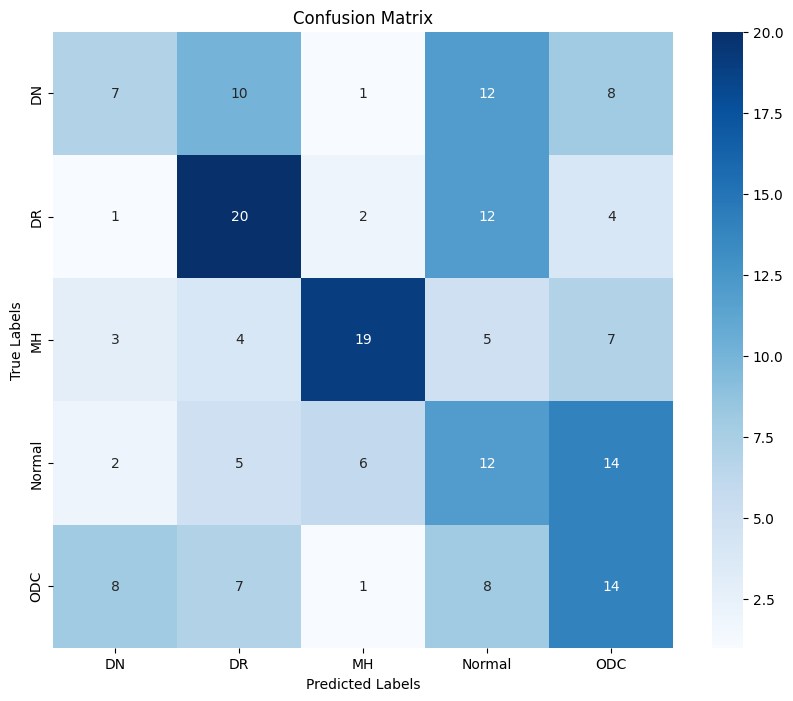

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_data_generator.class_indices, yticklabels=test_data_generator.class_indices)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print classification report
class_report = classification_report(test_labels, test_predictions, target_names=test_data_generator.class_indices.keys())
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

          DN       0.33      0.18      0.24        38
          DR       0.43      0.51      0.47        39
          MH       0.66      0.50      0.57        38
      Normal       0.24      0.31      0.27        39
         ODC       0.30      0.37      0.33        38

    accuracy                           0.38       192
   macro avg       0.39      0.37      0.38       192
weighted avg       0.39      0.38      0.38       192



### Neural Network Model

In [ ]:
from tensorflow.keras import backend
# Clearing backend
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Define the ANN model
model = Sequential()

# Flatten the input image from 3D to 1D
model.add(Flatten(input_shape=(224, 224, 3)))

# Add Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(train_data_generator.num_classes, activation='softmax'))  # Use the number of classes in the final layer

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 512)               77070848  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 5)                 6

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

In [ ]:
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 50

In [ ]:
# Train the model
history = model.fit(
    train_data_generator,
    steps_per_epoch=train_data_generator.samples // batch_size,
    validation_data=validation_data_generator,
    validation_steps=validation_data_generator.samples // batch_size,
    epochs=15,
    callbacks = callbacks_list
)

Epoch 1/15
16/16 [==============================] - ETA: 0s - loss: 1.6097 - accuracy: 0.1928

16/16 [==============================] - 85s 5s/step - loss: 1.6097 - accuracy: 0.1928 - val_loss: 1.6095 - val_accuracy: 0.1953 - lr: 0.0010
Epoch 2/15
16/16 [==============================] - ETA: 0s - loss: 1.6096 - accuracy: 0.1968

16/16 [==============================] - 102s 6s/step - loss: 1.6096 - accuracy: 0.1968 - val_loss: 1.6094 - val_accuracy: 0.2031 - lr: 0.0010
Epoch 3/15
16/16 [==============================] - ETA: 0s - loss: 1.6095 - accuracy: 0.2008

16/16 [==============================] - 84s 5s/step - loss: 1.6095 - accuracy: 0.2008 - val_loss: 1.6094 - val_accuracy: 0.2031 - lr: 0.0010
Epoch 4/15
16/16 [==============================] - ETA: 0s - loss: 1.6096 - accuracy: 0.1968

16/16 [==============================] - 93s 6s/step - loss: 1.6096 - accuracy: 0.1968 - val_loss: 1.6095 - val_accuracy: 0.1953 - lr: 0.0010
Epoch 5/15
16/16 [==============================] - ETA: 0s - loss: 1.6098 - accuracy: 0.2048Restoring model weights from the end of the best epoch: 2.



Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
16/16 [==============================] - 95s 6s/step - loss: 1.6098 - accuracy: 0.2048 - val_loss: 1.6094 - val_accuracy: 0.2031 - lr: 0.0010
Epoch 5: early stopping


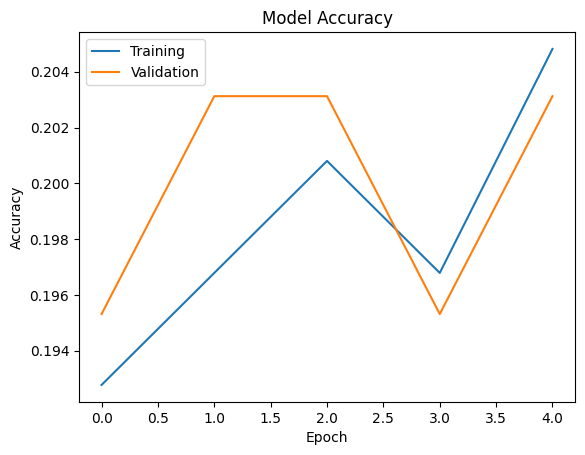

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 126ms/step


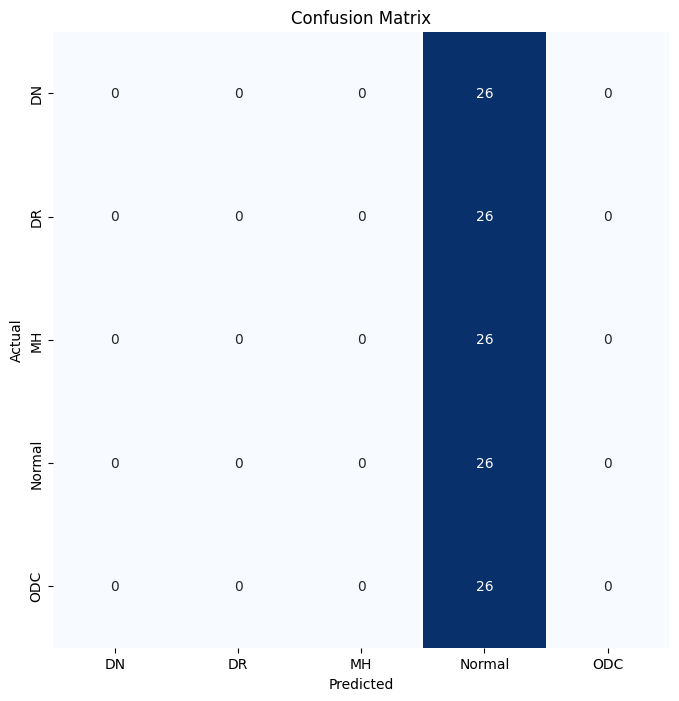

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['DN', 'DR', 'MH', 'Normal', 'ODC']

# Assuming you have a model named 'model1' and data generators 'train_data_generator_gaussian' and 'validation_data_generator_gaussian'

# Function to get true labels and predictions
def get_labels_and_predictions(data_generator, model):
    true_labels = []
    predicted_classes = []

    for i in range(len(data_generator)):
        images, labels = next(data_generator)
        true_labels.extend(np.argmax(labels, axis=1))

        predictions = model.predict(images)
        predicted_classes.extend(np.argmax(predictions, axis=1))

    return np.array(true_labels), np.array(predicted_classes)

# Get true labels and predicted classes for the validation set
true_labels, predicted_classes = get_labels_and_predictions(validation_data_generator, model)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have true labels and predicted classes
# true_labels: True class labels
# predicted_classes: Predicted class labels

# Define class names
class_names = ['DN', 'DR', 'MH', 'Normal', 'ODC']

# Generate the classification report
report = classification_report(true_labels, predicted_classes, target_names=class_names)

# Print and plot the classification report as a table
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          DN       0.00      0.00      0.00        26
          DR       0.00      0.00      0.00        26
          MH       0.00      0.00      0.00        26
      Normal       0.20      1.00      0.33        26
         ODC       0.00      0.00      0.00        26

    accuracy                           0.20       130
   macro avg       0.04      0.20      0.07       130
weighted avg       0.04      0.20      0.07       130



### Basic CNN Model

In [ ]:
from tensorflow.keras import backend
# Clearing backend
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
  # Initializing a Sequential Model
  model1 = Sequential()

  # Adding the first Convolutional block
  model1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu", input_shape = (224, 224, 3)))
  model1.add(MaxPooling2D(pool_size = 2))
  model1.add(Dropout(0.2))

  # Adding the second Convolutional block
  model1.add(Conv2D(filters=32, kernel_size = 2, padding = "same", activation = "relu"))
  model1.add(MaxPooling2D(pool_size = 2))
  model1.add(Dropout(0.2))

  # Adding the third Convolutional block
  model1.add(Conv2D(filters=32, kernel_size = 2, padding = "same", activation = "relu"))
  model1.add(MaxPooling2D(pool_size = 2))
  model1.add(Dropout(0.2))

  # Adding the Flatten layer
  model1.add(Flatten())

  # Adding the first Dense layer
  model1.add(Dense(512,activation = "relu"))
  model1.add(Dropout(0.4))

  # Adding the final layer
  model1.add(Dense(5,activation = "softmax"))

  model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 32)        0

**Let us understand the parameters in each layer:**

Conv2D Layers:
1. conv2d (Conv2D):

- Filters: 64
- Kernel size: (3, 3)
- Input channels: 3 (assuming input is RGB image)
- Parameters: (3×3×3+1)×64=832

2. conv2d_1 (Conv2D):

- Filters: 32
- Kernel size: (3, 3)
- Input channels: 64 (output of previous layer)
- Parameters: (3×3×64+1)×32=8224

3. conv2d_2 (Conv2D):

- Filters: 32
- Kernel size: (3, 3)
- Input channels: 32 (output of previous layer)
- Parameters: (3×3×32+1)×32=4128

4.MaxPooling2D Layers:
Max pooling layers do not have parameters as they only perform downsampling operations.

5. Dropout Layers:
Dropout layers do not have parameters. They only randomly set a fraction of input units to 0 at each update during training time to prevent overfitting.

6. Flatten Layer:
The flatten layer converts the 3D output from the previous layer into a 1D vector. It doesn't have parameters.

7. Dense Layers:
dense (Dense):

1. Units: 512
- Input units: 10368 (flattened output from the previous layer)
- Parameters: 10368×512+512=5308928

2. dense_1 (Dense):
- Units: 5
- Input units: 512
- Parameters: 512×5+5=2565

Total Parameters Calculation:
Summing up the parameters from each layer:

- conv2d: 832
- conv2d_1: 8224
- conv2d_2: 4128
- dense: 5308928
- dense_1: 2565
- Total parameters: 832+8224+4128+5308928+2565=5324677

This matches the total parameters listed in your model summary. The parameters are calculated based on the weights and biases in each layer. For Conv2D layers, the parameters are determined by the kernel size, number of filters, and input channels. For Dense layers, the parameters are determined by the number of units and input units.

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

In [ ]:
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 50

In [ ]:
model1.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
history = model1.fit(train_data_generator,
                                steps_per_epoch = train_data_generator.n//train_data_generator.batch_size,
                                epochs = epochs,
                                validation_data = validation_data_generator,
                                validation_steps = validation_data_generator.n//validation_data_generator.batch_size,
                                callbacks = callbacks_list
                                )

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 1.6638 - accuracy: 0.2289

16/16 [==============================] - 58s 3s/step - loss: 1.6638 - accuracy: 0.2289 - val_loss: 1.6029 - val_accuracy: 0.2344 - lr: 0.0010
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 1.5539 - accuracy: 0.3112

16/16 [==============================] - 52s 3s/step - loss: 1.5539 - accuracy: 0.3112 - val_loss: 1.5640 - val_accuracy: 0.3359 - lr: 0.0010
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 1.5345 - accuracy: 0.3112

16/16 [==============================] - 51s 3s/step - loss: 1.5345 - accuracy: 0.3112 - val_loss: 1.5660 - val_accuracy: 0.3516 - lr: 0.0010
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 1.5450 - accuracy: 0.3193

16/16 [==============================] - 51s 3s/step - loss: 1.5450 - accuracy: 0.3193 - val_loss: 1.5811 - val_accuracy: 0.3203 - lr: 0.0010
Epoch 5/50
16/16 [==============================] - ETA: 0s - loss: 1.5266 - accuracy: 0.3233

16/16 [==============================] - 52s 3s/step - loss: 1.5266 - accuracy: 0.3233 - val_loss: 1.5621 - val_accuracy: 0.3203 - lr: 0.0010
Epoch 6/50
16/16 [==============================] - ETA: 0s - loss: 1.4754 - accuracy: 0.3554

16/16 [==============================] - 52s 3s/step - loss: 1.4754 - accuracy: 0.3554 - val_loss: 1.5138 - val_accuracy: 0.3984 - lr: 0.0010
Epoch 7/50
16/16 [==============================] - ETA: 0s - loss: 1.4718 - accuracy: 0.3855

16/16 [==============================] - 52s 3s/step - loss: 1.4718 - accuracy: 0.3855 - val_loss: 1.5333 - val_accuracy: 0.3438 - lr: 0.0010
Epoch 8/50
16/16 [==============================] - ETA: 0s - loss: 1.4478 - accuracy: 0.3916

16/16 [==============================] - 50s 3s/step - loss: 1.4478 - accuracy: 0.3916 - val_loss: 1.5635 - val_accuracy: 0.2969 - lr: 0.0010
Epoch 9/50
16/16 [==============================] - ETA: 0s - loss: 1.4562 - accuracy: 0.3755Restoring model weights from the end of the best epoch: 6.



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
16/16 [==============================] - 52s 3s/step - loss: 1.4562 - accuracy: 0.3755 - val_loss: 1.5310 - val_accuracy: 0.3047 - lr: 0.0010
Epoch 9: early stopping


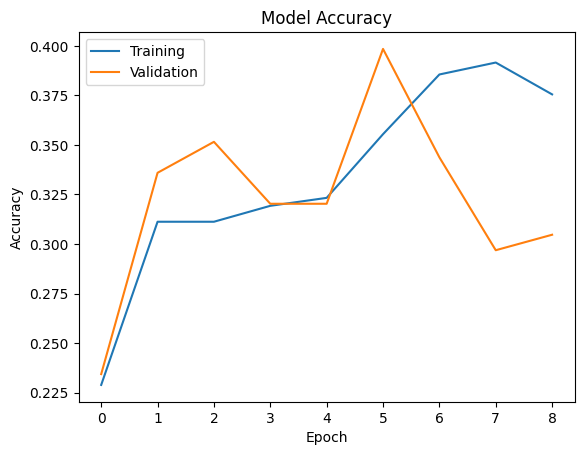

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 73ms/step


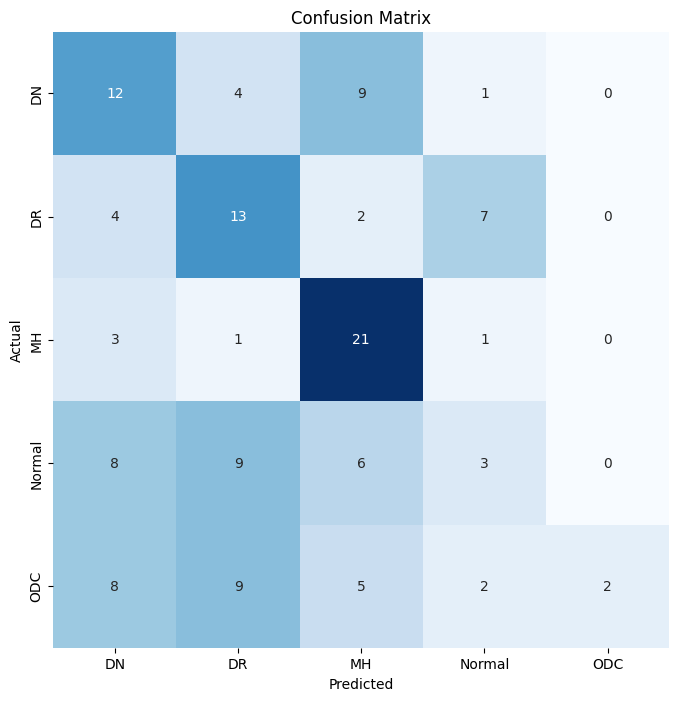

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['DN', 'DR', 'MH', 'Normal', 'ODC']

# Assuming you have a model named 'model1' and data generators 'train_data_generator_gaussian' and 'validation_data_generator_gaussian'

# Function to get true labels and predictions
def get_labels_and_predictions(data_generator, model):
    true_labels = []
    predicted_classes = []

    for i in range(len(data_generator)):
        images, labels = next(data_generator)
        true_labels.extend(np.argmax(labels, axis=1))

        predictions = model.predict(images)
        predicted_classes.extend(np.argmax(predictions, axis=1))

    return np.array(true_labels), np.array(predicted_classes)

# Get true labels and predicted classes for the validation set
true_labels, predicted_classes = get_labels_and_predictions(validation_data_generator, model1)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have true labels and predicted classes
# true_labels: True class labels
# predicted_classes: Predicted class labels

# Define class names
class_names = ['DN', 'DR', 'MH', 'Normal', 'ODC']

# Generate the classification report
report = classification_report(true_labels, predicted_classes, target_names=class_names)

# Print and plot the classification report as a table
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          DN       0.34      0.46      0.39        26
          DR       0.36      0.50      0.42        26
          MH       0.49      0.81      0.61        26
      Normal       0.21      0.12      0.15        26
         ODC       1.00      0.08      0.14        26

    accuracy                           0.39       130
   macro avg       0.48      0.39      0.34       130
weighted avg       0.48      0.39      0.34       130



### Tuned CNN Model

In [ ]:
from tensorflow.keras import backend
# Clearing backend
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model2 = Sequential()
# Adding the first Convolutional block
model2.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape=(224, 224, 3)))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(5,5), activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model2.add(Conv2D(512, kernel_size=(2,2), activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dropout(0.3))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(5, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 128)     204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 51, 51, 512)       5

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 50

In [ ]:
model2.compile(loss = 'categorical_crossentropy',optimizer = Adam(learning_rate = 0.001),metrics = ['accuracy'])

In [ ]:
history_cnn = model2.fit(train_data_generator,
                                steps_per_epoch = train_data_generator.n//train_data_generator.batch_size,
                                epochs = epochs,
                                validation_data = validation_data_generator,
                                validation_steps = validation_data_generator.n//validation_data_generator.batch_size,
                                callbacks = callbacks_list
                                )

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 2.6373 - accuracy: 0.2249

16/16 [==============================] - 69s 3s/step - loss: 2.6373 - accuracy: 0.2249 - val_loss: 1.6054 - val_accuracy: 0.2031 - lr: 0.0010
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 1.5979 - accuracy: 0.2510

16/16 [==============================] - 53s 3s/step - loss: 1.5979 - accuracy: 0.2510 - val_loss: 1.5934 - val_accuracy: 0.2969 - lr: 0.0010
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 1.5643 - accuracy: 0.2992

16/16 [==============================] - 54s 3s/step - loss: 1.5643 - accuracy: 0.2992 - val_loss: 1.5491 - val_accuracy: 0.2812 - lr: 0.0010
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 1.5091 - accuracy: 0.3133

16/16 [==============================] - 53s 3s/step - loss: 1.5091 - accuracy: 0.3133 - val_loss: 1.5115 - val_accuracy: 0.3047 - lr: 0.0010
Epoch 5/50
16/16 [==============================] - ETA: 0s - loss: 1.5466 - accuracy: 0.2972

16/16 [==============================] - 53s 3s/step - loss: 1.5466 - accuracy: 0.2972 - val_loss: 1.4870 - val_accuracy: 0.3281 - lr: 0.0010
Epoch 6/50
16/16 [==============================] - ETA: 0s - loss: 1.4929 - accuracy: 0.3554

16/16 [==============================] - 53s 3s/step - loss: 1.4929 - accuracy: 0.3554 - val_loss: 1.4597 - val_accuracy: 0.3438 - lr: 0.0010
Epoch 7/50
16/16 [==============================] - ETA: 0s - loss: 1.4875 - accuracy: 0.3574

16/16 [==============================] - 52s 3s/step - loss: 1.4875 - accuracy: 0.3574 - val_loss: 1.4305 - val_accuracy: 0.4062 - lr: 0.0010
Epoch 8/50
16/16 [==============================] - ETA: 0s - loss: 1.4340 - accuracy: 0.3775

16/16 [==============================] - 52s 3s/step - loss: 1.4340 - accuracy: 0.3775 - val_loss: 1.4983 - val_accuracy: 0.3594 - lr: 0.0010
Epoch 9/50
16/16 [==============================] - ETA: 0s - loss: 1.4386 - accuracy: 0.4116

16/16 [==============================] - 51s 3s/step - loss: 1.4386 - accuracy: 0.4116 - val_loss: 1.4454 - val_accuracy: 0.4766 - lr: 0.0010
Epoch 10/50
16/16 [==============================] - ETA: 0s - loss: 1.4256 - accuracy: 0.3996

16/16 [==============================] - 52s 3s/step - loss: 1.4256 - accuracy: 0.3996 - val_loss: 1.4034 - val_accuracy: 0.3984 - lr: 0.0010
Epoch 11/50
16/16 [==============================] - ETA: 0s - loss: 1.3607 - accuracy: 0.4398

16/16 [==============================] - 52s 3s/step - loss: 1.3607 - accuracy: 0.4398 - val_loss: 1.4013 - val_accuracy: 0.4219 - lr: 0.0010
Epoch 12/50
16/16 [==============================] - ETA: 0s - loss: 1.3268 - accuracy: 0.4659

16/16 [==============================] - 52s 3s/step - loss: 1.3268 - accuracy: 0.4659 - val_loss: 1.5471 - val_accuracy: 0.3281 - lr: 0.0010
Epoch 13/50
16/16 [==============================] - ETA: 0s - loss: 1.3188 - accuracy: 0.4639

16/16 [==============================] - 53s 3s/step - loss: 1.3188 - accuracy: 0.4639 - val_loss: 1.4001 - val_accuracy: 0.4062 - lr: 0.0010
Epoch 14/50
16/16 [==============================] - ETA: 0s - loss: 1.2576 - accuracy: 0.4980

16/16 [==============================] - 51s 3s/step - loss: 1.2576 - accuracy: 0.4980 - val_loss: 1.4374 - val_accuracy: 0.4141 - lr: 0.0010
Epoch 15/50
16/16 [==============================] - ETA: 0s - loss: 1.2108 - accuracy: 0.5100

16/16 [==============================] - 53s 3s/step - loss: 1.2108 - accuracy: 0.5100 - val_loss: 1.3550 - val_accuracy: 0.4531 - lr: 0.0010
Epoch 16/50
16/16 [==============================] - ETA: 0s - loss: 1.1467 - accuracy: 0.5382

16/16 [==============================] - 53s 3s/step - loss: 1.1467 - accuracy: 0.5382 - val_loss: 1.4400 - val_accuracy: 0.4453 - lr: 0.0010
Epoch 17/50
16/16 [==============================] - ETA: 0s - loss: 1.0712 - accuracy: 0.5783

16/16 [==============================] - 52s 3s/step - loss: 1.0712 - accuracy: 0.5783 - val_loss: 1.4349 - val_accuracy: 0.4531 - lr: 0.0010
Epoch 18/50
16/16 [==============================] - ETA: 0s - loss: 1.0551 - accuracy: 0.5703Restoring model weights from the end of the best epoch: 15.



Epoch 18: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
16/16 [==============================] - 52s 3s/step - loss: 1.0551 - accuracy: 0.5703 - val_loss: 1.5055 - val_accuracy: 0.4141 - lr: 0.0010
Epoch 18: early stopping


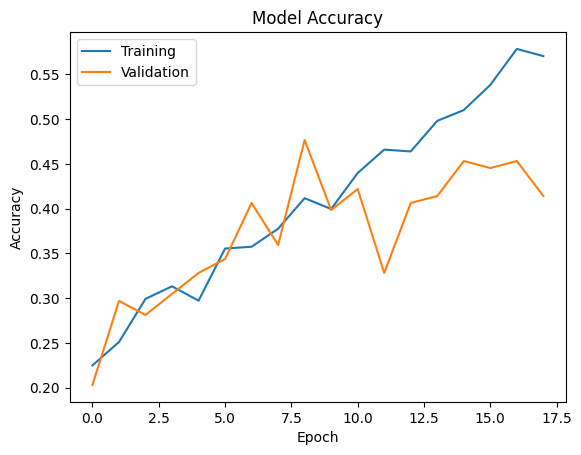

In [ ]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 1s 549ms/step


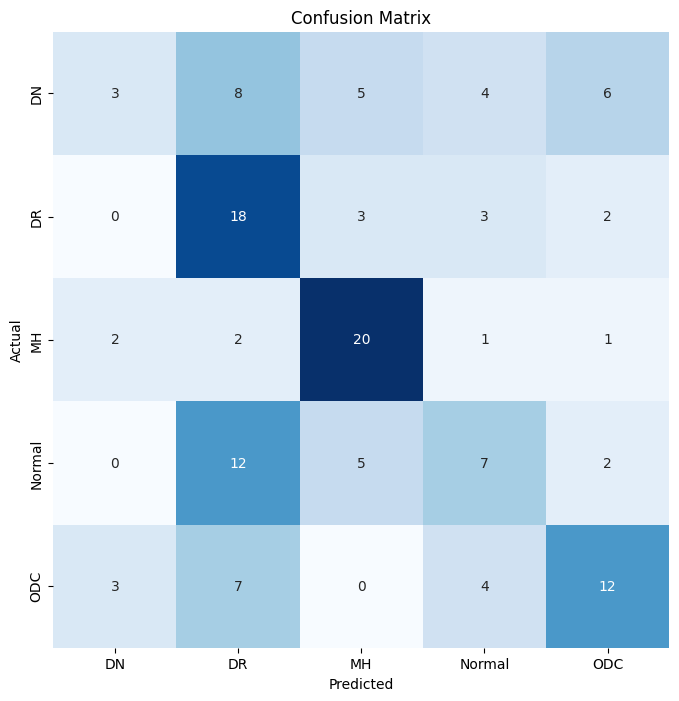

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['DN', 'DR', 'MH', 'Normal', 'ODC']

# Assuming you have a model named 'model1' and data generators 'train_data_generator_gaussian' and 'validation_data_generator_gaussian'

# Function to get true labels and predictions
def get_labels_and_predictions(data_generator, model):
    true_labels = []
    predicted_classes = []

    for i in range(len(data_generator)):
        images, labels = next(data_generator)
        true_labels.extend(np.argmax(labels, axis=1))

        predictions = model.predict(images)
        predicted_classes.extend(np.argmax(predictions, axis=1))

    return np.array(true_labels), np.array(predicted_classes)

# Get true labels and predicted classes for the validation set
true_labels, predicted_classes = get_labels_and_predictions(validation_data_generator, model2)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have true labels and predicted classes
# true_labels: True class labels
# predicted_classes: Predicted class labels

# Define class names
class_names = ['DN', 'DR', 'MH', 'Normal', 'ODC']

# Generate the classification report
report = classification_report(true_labels, predicted_classes, target_names=class_names)

# Print and plot the classification report as a table
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          DN       0.38      0.12      0.18        26
          DR       0.38      0.69      0.49        26
          MH       0.61      0.77      0.68        26
      Normal       0.37      0.27      0.31        26
         ODC       0.52      0.46      0.49        26

    accuracy                           0.46       130
   macro avg       0.45      0.46      0.43       130
weighted avg       0.45      0.46      0.43       130



### VGG-16 Model

**Understanding Transfer Learning**

Transfer learning is a machine learning technique where a model developed for one task is repurposed as the foundation for a model on a different, but related, task. This method leverages the knowledge gained from solving one problem to tackle another, and it has become particularly popular in deep learning, especially with neural networks.

**Key Concepts and Benefits of Transfer Learning**:

- Pre-trained Model: Transfer learning begins with a pre-trained model that has been trained on a large dataset, thus learning useful features and representations.

- New Task: The objective is to adapt this pre-trained model to a new task that is similar or related to the original one.

- Fine-Tuning: To tailor the pre-trained model to the new task, you typically modify and retrain its final layers on the new dataset, a process known as "fine-tuning."

**Benefits**:

- Faster Training: Transfer learning significantly reduces the training time for the new task since the model's lower layers have already learned general low-level features.
- Improved Performance: The technique often enhances performance on the new task by utilizing the knowledge and representations from the pre-training phase.
- Reduced Data Requirements: Transfer learning is particularly advantageous when data for the new task is limited, as it allows the use of knowledge from a larger, existing dataset.

**Types of Transfer Learning**:

- Feature Extraction: This approach uses the pre-trained model as a fixed feature extractor, where features from its layers are extracted and a new classifier is trained on these features.
- Fine-Tuning: This method involves not only using the pre-trained model for feature extraction but also fine-tuning some of its layers for the new task.

**Domains of Application**:

Transfer learning is widely used in areas such as computer vision, natural language processing, and more. For instance, a pre-trained convolutional neural network (CNN) like VGG16 can be utilized for image classification, or a pre-trained language model like BERT can be fine-tuned for various natural language understanding tasks.

**Common Pre-trained Models**:

Popular pre-trained models like VGG, ResNet, Inception, and various BERT variants serve as starting points for a wide range of tasks.

In summary, transfer learning is a powerful technique that capitalizes on the knowledge embedded in pre-trained models to address new and related machine learning tasks more efficiently and effectively, especially when data or computational resources are constrained.

<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16.jpg" width="1300" height="500"></center>

The VGG16 (Visual Geometry Group 16) architecture is a well-known convolutional neural network (CNN) model used for image classification and object recognition. Here's an overview of the VGG16 architecture:

- Deep CNN Architecture: VGG16 is a deep convolutional neural network with 16 weight layers, including 13 convolutional layers and 3 fully connected layers.

- Standardized Convolution Blocks: The network features a consistent structure where each convolutional block contains two or more convolutional layers followed by a max-pooling layer, contributing to its robustness.

- 3x3 Convolution Filters: Each convolutional layer uses 3x3 filters, which help in learning more complex features compared to larger filters.

- Multiple Pooling Layers: Max-pooling layers are employed to reduce the spatial dimensions of the feature maps while preserving crucial information.

- Fully Connected Layers: The network concludes with three fully connected layers that make the final classification decisions. The last fully connected layer has neurons equal to the number of classes in the classification task.

- ReLU Activation: Rectified Linear Unit (ReLU) activation functions are used throughout the network to introduce non-linearity, aiding in learning complex patterns and features.

- Dropout Regularization: Dropout layers are included to mitigate overfitting by randomly dropping a certain percentage of neurons during training.

- Large Number of Parameters: VGG16 has a substantial number of parameters, making it suitable for tasks requiring large datasets or high computational resources.

- ImageNet Pre-training: VGG16 is often pre-trained on the ImageNet dataset, a vast collection of images across thousands of categories. This pre-training enables the model to learn a wide array of features, which can be fine-tuned for specific tasks.

- Transfer Learning: VGG16 is a popular choice for transfer learning, where the pre-trained model is used as a feature extractor for custom image classification tasks.

- Downsampling: As the network progresses, the spatial dimensions of the feature maps decrease while the depth (number of channels) increases, allowing the network to capture features at various scales.

- Softmax Output Layer: The final fully connected layer typically uses the softmax activation function to produce class probabilities for multi-class classification tasks.

- State-of-the-Art Performance: At its release, VGG16 achieved state-of-the-art performance on several image classification benchmarks and remains a valuable architecture for many computer vision tasks.

In [ ]:
from tensorflow.keras import backend
# Clearing backend
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from keras.applications.vgg16 import VGG16
# Summary of the whole model
model = VGG16(weights='imagenet')
model.summary()

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
from keras.models import Sequential, Model
# Getting only the conv layers for transfer learning.
transfer_layer = model.get_layer('block5_pool')
vgg_model = Model(inputs=model.input, outputs=transfer_layer.output)

In [ ]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (224,224,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(5, activation='softmax'))

In [ ]:
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_2 = new_model.fit(train_data_generator,
                                steps_per_epoch = train_data_generator.n//train_data_generator.batch_size,
                                epochs = 50,
                                validation_data = train_data_generator,
                                validation_steps = validation_data_generator.n//validation_data_generator.batch_size,
                                callbacks = callbacks_list
                                )

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 2.1253 - accuracy: 0.2751

16/16 [==============================] - 63s 4s/step - loss: 2.1253 - accuracy: 0.2751 - val_loss: 1.5347 - val_accuracy: 0.3672 - lr: 0.0010
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 1.3691 - accuracy: 0.4357

16/16 [==============================] - 58s 4s/step - loss: 1.3691 - accuracy: 0.4357 - val_loss: 1.1918 - val_accuracy: 0.4766 - lr: 0.0010
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 1.1404 - accuracy: 0.5201

16/16 [==============================] - 56s 4s/step - loss: 1.1404 - accuracy: 0.5201 - val_loss: 1.1048 - val_accuracy: 0.5078 - lr: 0.0010
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 1.0568 - accuracy: 0.5803

16/16 [==============================] - 57s 4s/step - loss: 1.0568 - accuracy: 0.5803 - val_loss: 1.0053 - val_accuracy: 0.6094 - lr: 0.0010
Epoch 5/50
16/16 [==============================] - ETA: 0s - loss: 1.0006 - accuracy: 0.5924

16/16 [==============================] - 58s 4s/step - loss: 1.0006 - accuracy: 0.5924 - val_loss: 0.9663 - val_accuracy: 0.6719 - lr: 0.0010
Epoch 6/50
16/16 [==============================] - ETA: 0s - loss: 1.0630 - accuracy: 0.5582

16/16 [==============================] - 59s 4s/step - loss: 1.0630 - accuracy: 0.5582 - val_loss: 0.9679 - val_accuracy: 0.5781 - lr: 0.0010
Epoch 7/50
16/16 [==============================] - ETA: 0s - loss: 1.0148 - accuracy: 0.6145

16/16 [==============================] - 58s 4s/step - loss: 1.0148 - accuracy: 0.6145 - val_loss: 0.9128 - val_accuracy: 0.6328 - lr: 0.0010
Epoch 8/50
16/16 [==============================] - ETA: 0s - loss: 0.9438 - accuracy: 0.6365

16/16 [==============================] - 64s 4s/step - loss: 0.9438 - accuracy: 0.6365 - val_loss: 0.8691 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 9/50
16/16 [==============================] - ETA: 0s - loss: 0.9749 - accuracy: 0.6245

16/16 [==============================] - 62s 4s/step - loss: 0.9749 - accuracy: 0.6245 - val_loss: 1.0989 - val_accuracy: 0.5078 - lr: 0.0010
Epoch 10/50
16/16 [==============================] - ETA: 0s - loss: 0.9630 - accuracy: 0.6124

16/16 [==============================] - 56s 4s/step - loss: 0.9630 - accuracy: 0.6124 - val_loss: 0.8380 - val_accuracy: 0.7031 - lr: 0.0010
Epoch 11/50
16/16 [==============================] - ETA: 0s - loss: 0.7918 - accuracy: 0.7209

16/16 [==============================] - 66s 4s/step - loss: 0.7918 - accuracy: 0.7209 - val_loss: 0.8701 - val_accuracy: 0.6406 - lr: 0.0010
Epoch 12/50
16/16 [==============================] - ETA: 0s - loss: 0.9602 - accuracy: 0.6064

16/16 [==============================] - 64s 4s/step - loss: 0.9602 - accuracy: 0.6064 - val_loss: 0.7804 - val_accuracy: 0.6406 - lr: 0.0010
Epoch 13/50
16/16 [==============================] - ETA: 0s - loss: 0.8215 - accuracy: 0.6807

16/16 [==============================] - 63s 4s/step - loss: 0.8215 - accuracy: 0.6807 - val_loss: 0.7054 - val_accuracy: 0.7656 - lr: 0.0010
Epoch 14/50
16/16 [==============================] - ETA: 0s - loss: 0.7789 - accuracy: 0.6928

16/16 [==============================] - 58s 4s/step - loss: 0.7789 - accuracy: 0.6928 - val_loss: 0.6883 - val_accuracy: 0.7266 - lr: 0.0010
Epoch 15/50
16/16 [==============================] - ETA: 0s - loss: 0.7461 - accuracy: 0.7329

16/16 [==============================] - 58s 4s/step - loss: 0.7461 - accuracy: 0.7329 - val_loss: 0.6343 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 16/50
16/16 [==============================] - ETA: 0s - loss: 0.6859 - accuracy: 0.7610

16/16 [==============================] - 57s 4s/step - loss: 0.6859 - accuracy: 0.7610 - val_loss: 0.6651 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 17/50
16/16 [==============================] - ETA: 0s - loss: 0.6988 - accuracy: 0.7590

16/16 [==============================] - 63s 4s/step - loss: 0.6988 - accuracy: 0.7590 - val_loss: 0.6107 - val_accuracy: 0.8047 - lr: 0.0010
Epoch 18/50
16/16 [==============================] - ETA: 0s - loss: 0.6650 - accuracy: 0.7711

16/16 [==============================] - 62s 4s/step - loss: 0.6650 - accuracy: 0.7711 - val_loss: 0.5552 - val_accuracy: 0.8203 - lr: 0.0010
Epoch 19/50
16/16 [==============================] - ETA: 0s - loss: 0.7392 - accuracy: 0.7329

16/16 [==============================] - 62s 4s/step - loss: 0.7392 - accuracy: 0.7329 - val_loss: 0.7096 - val_accuracy: 0.7344 - lr: 0.0010
Epoch 20/50
16/16 [==============================] - ETA: 0s - loss: 0.7107 - accuracy: 0.7570

16/16 [==============================] - 63s 4s/step - loss: 0.7107 - accuracy: 0.7570 - val_loss: 0.5662 - val_accuracy: 0.7969 - lr: 0.0010
Epoch 21/50
16/16 [==============================] - ETA: 0s - loss: 0.6379 - accuracy: 0.7932Restoring model weights from the end of the best epoch: 18.



Epoch 21: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
16/16 [==============================] - 61s 4s/step - loss: 0.6379 - accuracy: 0.7932 - val_loss: 0.6511 - val_accuracy: 0.7656 - lr: 0.0010
Epoch 21: early stopping


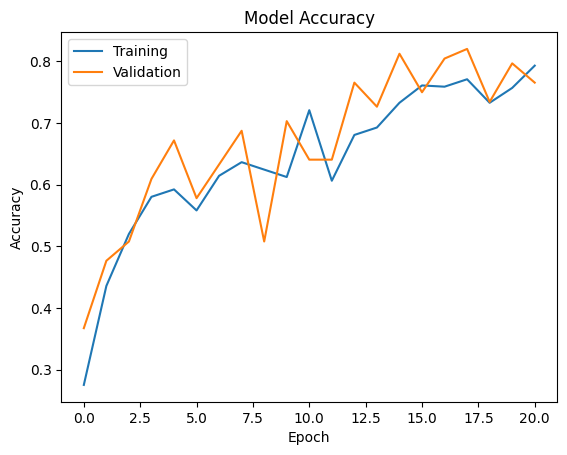

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 1s 1s/step


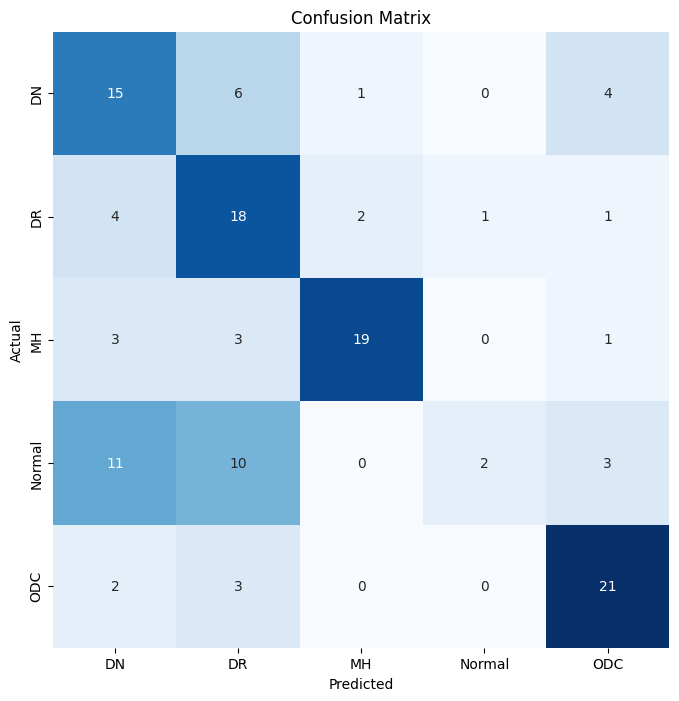

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['DN', 'DR', 'MH', 'Normal', 'ODC']

# Assuming you have a model named 'model1' and data generators 'train_data_generator_gaussian' and 'validation_data_generator_gaussian'

# Function to get true labels and predictions
def get_labels_and_predictions(data_generator, model):
    true_labels = []
    predicted_classes = []

    for i in range(len(data_generator)):
        images, labels = next(data_generator)
        true_labels.extend(np.argmax(labels, axis=1))

        predictions = model.predict(images)
        predicted_classes.extend(np.argmax(predictions, axis=1))

    return np.array(true_labels), np.array(predicted_classes)

# Get true labels and predicted classes for the validation set
true_labels, predicted_classes = get_labels_and_predictions(validation_data_generator, new_model)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have true labels and predicted classes
# true_labels: True class labels
# predicted_classes: Predicted class labels

# Define class names
class_names = ['DN', 'DR', 'MH', 'Normal', 'ODC']

# Generate the classification report
report = classification_report(true_labels, predicted_classes, target_names=class_names)

# Print and plot the classification report as a table
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          DN       0.42      0.65      0.52        26
          DR       0.48      0.62      0.54        26
          MH       0.62      0.81      0.70        26
      Normal       0.50      0.08      0.13        26
         ODC       0.79      0.58      0.67        26

    accuracy                           0.55       130
   macro avg       0.56      0.55      0.51       130
weighted avg       0.56      0.55      0.51       130



### InceptionV3 Model 

<center><img src="https://static.wixstatic.com/media/40af5e_e8ddb018141e4726b0fef08597e660e4~mv2.png/v1/fill/w_378,h_631,al_c,lg_1,q_85,enc_auto/40af5e_e8ddb018141e4726b0fef08597e660e4~mv2.png" width="1300" height="1000"></center>

**Inception V3**

InceptionV3 is a convolutional neural network (CNN) architecture designed for image classification and object recognition tasks. It belongs to the Inception family of architectures, which are known for their efficient computation and ability to capture features at multiple scales. Developed by Google, InceptionV3 has been widely used in various computer vision applications.

**Key Components and Characteristics of InceptionV3**:

- Inception Modules: The core of Inception architectures is the inception module, which comprises multiple convolutional layers with different filter sizes and operations. InceptionV3 includes several such modules, capturing features at various scales and levels of abstraction.

- Parallel Operations: Inception modules perform parallel convolutional operations with filter sizes like 1x1, 3x3, and 5x5, which helps capture features at different receptive field sizes, essential for recognizing objects of various scales in images.

- 1x1 Convolutions: InceptionV3 uses 1x1 convolutions within the inception modules to reduce the dimensionality of feature maps, thereby reducing computation and aiding in feature extraction and fusion.

- Global Average Pooling: Instead of fully connected layers at the network's end, InceptionV3 employs global average pooling, which computes the average value for each feature map, resulting in a compact representation for classification.

- Auxiliary Classifiers: InceptionV3 includes auxiliary classifiers at intermediate stages to assist with gradient flow during training and provide additional regularization, addressing the vanishing gradient problem.

- Pretrained Model: InceptionV3 is often pretrained on large datasets like ImageNet, enabling it to learn useful feature representations that can be fine-tuned for specific tasks with smaller datasets.

- Regularization: Various regularization techniques, such as dropout and batch normalization, are incorporated to enhance the model's generalization capabilities.

- Multiple Outputs: InceptionV3 can have multiple output heads for different tasks, making it versatile for various vision tasks like image classification, object detection, and semantic segmentation.

InceptionV3 is a deep architecture that balances model complexity with computational efficiency. It has achieved state-of-the-art results in numerous computer vision competitions and tasks, making it suitable for applications such as image classification and object detection. It is also frequently used as a backbone in more complex vision models.

In [ ]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape = (224,224,3))

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

In [ ]:
InceptionV3_model.trainable = False

model_3 = Sequential()
model_3.add(InceptionV3_model)
model_3.add(GlobalAveragePooling2D())
model_3.add(Dropout(0.5))
model_3.add(Dense(5, activation='softmax'))

In [ ]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(train_data_generator,
                                steps_per_epoch = train_data_generator.n//train_data_generator.batch_size,
                                epochs = 50,
                                validation_data = validation_data_generator,
                                validation_steps = validation_data_generator.n//validation_data_generator.batch_size,
                                callbacks = callbacks_list
                                )

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 1.8498 - accuracy: 0.2731

16/16 [==============================] - 64s 4s/step - loss: 1.8498 - accuracy: 0.2731 - val_loss: 1.4311 - val_accuracy: 0.4531 - lr: 0.0010
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 1.5087 - accuracy: 0.4036

16/16 [==============================] - 53s 3s/step - loss: 1.5087 - accuracy: 0.4036 - val_loss: 1.4892 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 1.5473 - accuracy: 0.4137

16/16 [==============================] - 52s 3s/step - loss: 1.5473 - accuracy: 0.4137 - val_loss: 1.3005 - val_accuracy: 0.4844 - lr: 0.0010
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 1.3384 - accuracy: 0.4859

16/16 [==============================] - 52s 3s/step - loss: 1.3384 - accuracy: 0.4859 - val_loss: 1.2937 - val_accuracy: 0.4844 - lr: 0.0010
Epoch 5/50
16/16 [==============================] - ETA: 0s - loss: 1.2411 - accuracy: 0.5261

16/16 [==============================] - 53s 3s/step - loss: 1.2411 - accuracy: 0.5261 - val_loss: 1.3400 - val_accuracy: 0.4922 - lr: 0.0010
Epoch 6/50
16/16 [==============================] - ETA: 0s - loss: 1.2536 - accuracy: 0.5301

16/16 [==============================] - 52s 3s/step - loss: 1.2536 - accuracy: 0.5301 - val_loss: 1.2870 - val_accuracy: 0.4531 - lr: 0.0010
Epoch 7/50
16/16 [==============================] - ETA: 0s - loss: 1.1700 - accuracy: 0.5402

16/16 [==============================] - 52s 3s/step - loss: 1.1700 - accuracy: 0.5402 - val_loss: 1.4367 - val_accuracy: 0.4844 - lr: 0.0010
Epoch 8/50
16/16 [==============================] - ETA: 0s - loss: 1.1342 - accuracy: 0.5482

16/16 [==============================] - 51s 3s/step - loss: 1.1342 - accuracy: 0.5482 - val_loss: 1.3221 - val_accuracy: 0.5781 - lr: 0.0010
Epoch 9/50
16/16 [==============================] - ETA: 0s - loss: 1.1330 - accuracy: 0.5863Restoring model weights from the end of the best epoch: 6.



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
16/16 [==============================] - 52s 3s/step - loss: 1.1330 - accuracy: 0.5863 - val_loss: 1.2943 - val_accuracy: 0.4531 - lr: 0.0010
Epoch 9: early stopping


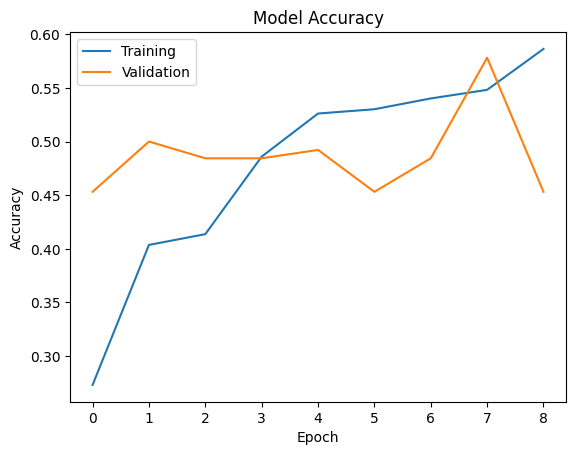

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 3s 3s/step


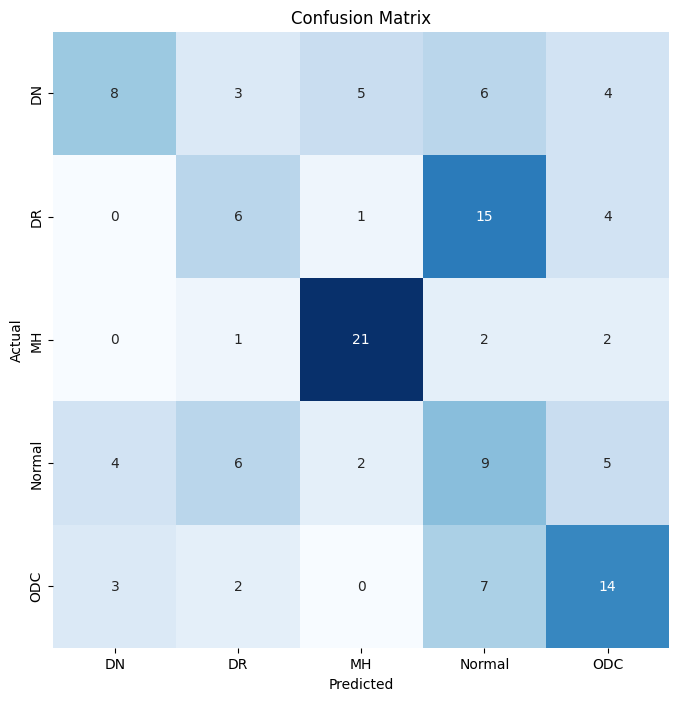

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['DN', 'DR', 'MH', 'Normal', 'ODC']

# Assuming you have a model named 'model1' and data generators 'train_data_generator_gaussian' and 'validation_data_generator_gaussian'

# Function to get true labels and predictions
def get_labels_and_predictions(data_generator, model):
    true_labels = []
    predicted_classes = []

    for i in range(len(data_generator)):
        images, labels = next(data_generator)
        true_labels.extend(np.argmax(labels, axis=1))

        predictions = model.predict(images)
        predicted_classes.extend(np.argmax(predictions, axis=1))

    return np.array(true_labels), np.array(predicted_classes)

# Get true labels and predicted classes for the validation set
true_labels, predicted_classes = get_labels_and_predictions(validation_data_generator, model_3)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have true labels and predicted classes
# true_labels: True class labels
# predicted_classes: Predicted class labels

# Define class names
class_names = ['DN', 'DR', 'MH', 'Normal', 'ODC']

# Generate the classification report
report = classification_report(true_labels, predicted_classes, target_names=class_names)

# Print and plot the classification report as a table
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          DN       0.53      0.31      0.39        26
          DR       0.33      0.23      0.27        26
          MH       0.72      0.81      0.76        26
      Normal       0.23      0.35      0.28        26
         ODC       0.48      0.54      0.51        26

    accuracy                           0.45       130
   macro avg       0.46      0.45      0.44       130
weighted avg       0.46      0.45      0.44       130



### VGG-16 Model with Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

# Define a function to apply Gaussian blur to an image


batch_size = 32
image_size = (224, 224)
num_epochs = 10


# Create an ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,
    rotation_range=40,  # Random rotation up to 40 degrees
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill mode for pixel values outside the image
)

# Load and preprocess data with validation split and data augmentation
train_data_generator_aug = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_data_generator_aug = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 530 images belonging to 5 classes.
Found 130 images belonging to 5 classes.


In [ ]:
history_5 = new_model.fit(train_data_generator_aug,
                                steps_per_epoch = train_data_generator_aug.n//train_data_generator_aug.batch_size,
                                epochs = 50,
                                validation_data = validation_data_generator_aug,
                                validation_steps = validation_data_generator_aug.n//validation_data_generator_aug.batch_size,
                                callbacks = callbacks_list
                                )

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 1.7479 - accuracy: 0.3534

16/16 [==============================] - 83s 5s/step - loss: 1.7479 - accuracy: 0.3534 - val_loss: 1.5891 - val_accuracy: 0.3281 - lr: 2.0000e-04
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 1.3693 - accuracy: 0.4378

16/16 [==============================] - 61s 4s/step - loss: 1.3693 - accuracy: 0.4378 - val_loss: 1.4632 - val_accuracy: 0.3828 - lr: 2.0000e-04
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 1.3100 - accuracy: 0.4618

16/16 [==============================] - 62s 4s/step - loss: 1.3100 - accuracy: 0.4618 - val_loss: 1.3811 - val_accuracy: 0.4844 - lr: 2.0000e-04
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 1.2455 - accuracy: 0.4759

16/16 [==============================] - 65s 4s/step - loss: 1.2455 - accuracy: 0.4759 - val_loss: 1.3809 - val_accuracy: 0.4062 - lr: 2.0000e-04
Epoch 5/50
16/16 [==============================] - ETA: 0s - loss: 1.2563 - accuracy: 0.4799

16/16 [==============================] - 58s 4s/step - loss: 1.2563 - accuracy: 0.4799 - val_loss: 1.3201 - val_accuracy: 0.4219 - lr: 2.0000e-04
Epoch 6/50
16/16 [==============================] - ETA: 0s - loss: 1.2542 - accuracy: 0.4759

16/16 [==============================] - 68s 4s/step - loss: 1.2542 - accuracy: 0.4759 - val_loss: 1.3325 - val_accuracy: 0.4766 - lr: 2.0000e-04
Epoch 7/50
16/16 [==============================] - ETA: 0s - loss: 1.2607 - accuracy: 0.4880

16/16 [==============================] - 58s 4s/step - loss: 1.2607 - accuracy: 0.4880 - val_loss: 1.3515 - val_accuracy: 0.4141 - lr: 2.0000e-04
Epoch 8/50
16/16 [==============================] - ETA: 0s - loss: 1.2189 - accuracy: 0.4940

16/16 [==============================] - 68s 4s/step - loss: 1.2189 - accuracy: 0.4940 - val_loss: 1.2985 - val_accuracy: 0.5156 - lr: 2.0000e-04
Epoch 9/50
16/16 [==============================] - ETA: 0s - loss: 1.2018 - accuracy: 0.5120

16/16 [==============================] - 58s 4s/step - loss: 1.2018 - accuracy: 0.5120 - val_loss: 1.3164 - val_accuracy: 0.4531 - lr: 2.0000e-04
Epoch 10/50
16/16 [==============================] - ETA: 0s - loss: 1.2485 - accuracy: 0.4719

16/16 [==============================] - 58s 4s/step - loss: 1.2485 - accuracy: 0.4719 - val_loss: 1.3072 - val_accuracy: 0.4609 - lr: 2.0000e-04
Epoch 11/50
16/16 [==============================] - ETA: 0s - loss: 1.1769 - accuracy: 0.5181Restoring model weights from the end of the best epoch: 8.



Epoch 11: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
16/16 [==============================] - 58s 4s/step - loss: 1.1769 - accuracy: 0.5181 - val_loss: 1.3207 - val_accuracy: 0.4453 - lr: 2.0000e-04
Epoch 11: early stopping


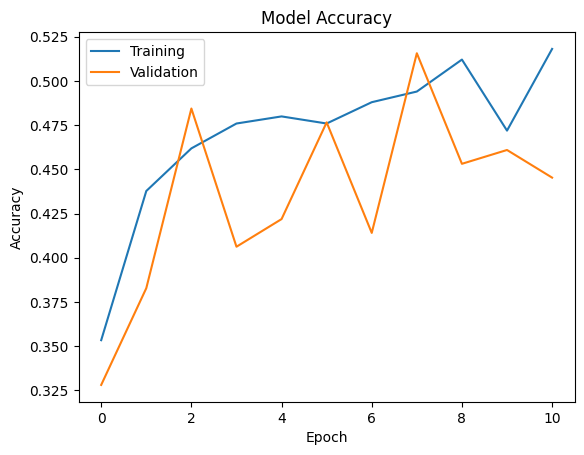

In [ ]:
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 19ms/step


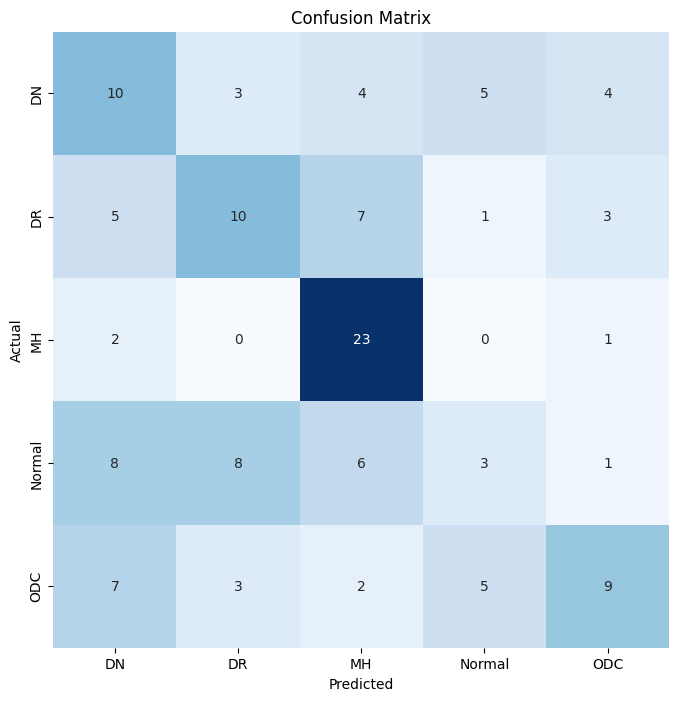

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['DN', 'DR', 'MH', 'Normal', 'ODC']

# Assuming you have a model named 'model1' and data generators 'train_data_generator_gaussian' and 'validation_data_generator_gaussian'

# Function to get true labels and predictions
def get_labels_and_predictions(data_generator, model):
    true_labels = []
    predicted_classes = []

    for i in range(len(data_generator)):
        images, labels = next(data_generator)
        true_labels.extend(np.argmax(labels, axis=1))

        predictions = model.predict(images)
        predicted_classes.extend(np.argmax(predictions, axis=1))

    return np.array(true_labels), np.array(predicted_classes)

# Get true labels and predicted classes for the validation set
true_labels, predicted_classes = get_labels_and_predictions(validation_data_generator_aug, new_model)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have true labels and predicted classes
# true_labels: True class labels
# predicted_classes: Predicted class labels

# Define class names
class_names = ['DN', 'DR', 'MH', 'Normal', 'ODC']

# Generate the classification report
report = classification_report(true_labels, predicted_classes, target_names=class_names)

# Print and plot the classification report as a table
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          DN       0.31      0.38      0.34        26
          DR       0.42      0.38      0.40        26
          MH       0.55      0.88      0.68        26
      Normal       0.21      0.12      0.15        26
         ODC       0.50      0.35      0.41        26

    accuracy                           0.42       130
   macro avg       0.40      0.42      0.40       130
weighted avg       0.40      0.42      0.40       130



### InceptionV3 Model with Data Augmentation

In [ ]:
history_6 = model_3.fit(train_data_generator_aug,
                                steps_per_epoch = train_data_generator_aug.n//train_data_generator_aug.batch_size,
                                epochs = 50,
                                validation_data = validation_data_generator_aug,
                                validation_steps = validation_data_generator_aug.n//validation_data_generator_aug.batch_size,
                                callbacks = callbacks_list
                                )

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 1.4748 - accuracy: 0.4739

16/16 [==============================] - 78s 5s/step - loss: 1.4748 - accuracy: 0.4739 - val_loss: 1.3548 - val_accuracy: 0.4922 - lr: 2.0000e-04
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 1.4200 - accuracy: 0.4518

16/16 [==============================] - 60s 4s/step - loss: 1.4200 - accuracy: 0.4518 - val_loss: 1.3996 - val_accuracy: 0.4609 - lr: 2.0000e-04
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 1.4432 - accuracy: 0.4679

16/16 [==============================] - 59s 4s/step - loss: 1.4432 - accuracy: 0.4679 - val_loss: 1.3017 - val_accuracy: 0.4531 - lr: 2.0000e-04
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 1.4603 - accuracy: 0.4518

16/16 [==============================] - 59s 4s/step - loss: 1.4603 - accuracy: 0.4518 - val_loss: 1.2586 - val_accuracy: 0.5156 - lr: 2.0000e-04
Epoch 5/50
16/16 [==============================] - ETA: 0s - loss: 1.4154 - accuracy: 0.4759

16/16 [==============================] - 68s 4s/step - loss: 1.4154 - accuracy: 0.4759 - val_loss: 1.4023 - val_accuracy: 0.4609 - lr: 2.0000e-04
Epoch 6/50
16/16 [==============================] - ETA: 0s - loss: 1.4352 - accuracy: 0.4137

16/16 [==============================] - 58s 4s/step - loss: 1.4352 - accuracy: 0.4137 - val_loss: 1.2970 - val_accuracy: 0.4766 - lr: 2.0000e-04
Epoch 7/50
16/16 [==============================] - ETA: 0s - loss: 1.3786 - accuracy: 0.4779Restoring model weights from the end of the best epoch: 4.



Epoch 7: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
16/16 [==============================] - 68s 4s/step - loss: 1.3786 - accuracy: 0.4779 - val_loss: 1.3527 - val_accuracy: 0.4375 - lr: 2.0000e-04
Epoch 7: early stopping


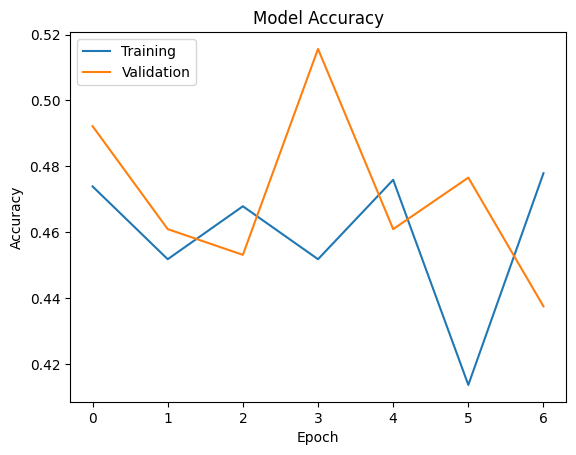

In [ ]:
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 25ms/step


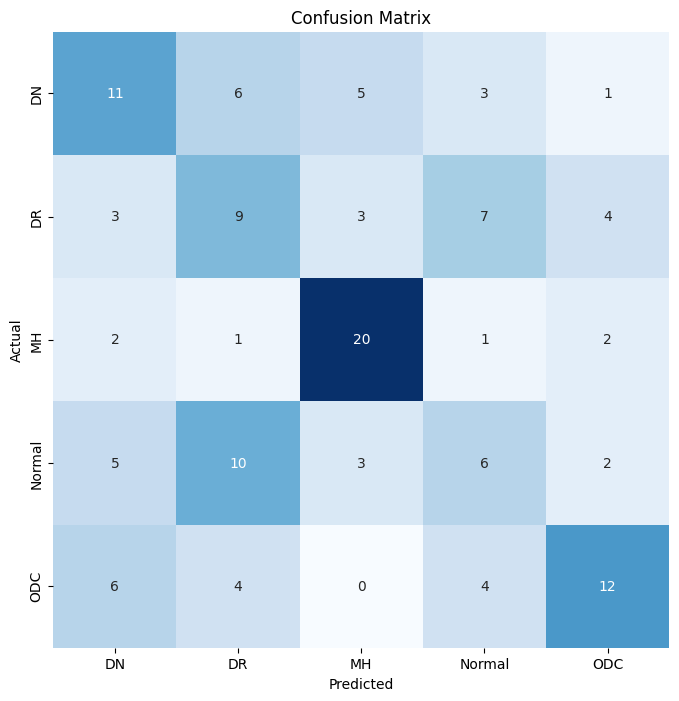

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['DN', 'DR', 'MH', 'Normal', 'ODC']

# Assuming you have a model named 'model1' and data generators 'train_data_generator_gaussian' and 'validation_data_generator_gaussian'

# Function to get true labels and predictions
def get_labels_and_predictions(data_generator, model):
    true_labels = []
    predicted_classes = []

    for i in range(len(data_generator)):
        images, labels = next(data_generator)
        true_labels.extend(np.argmax(labels, axis=1))

        predictions = model.predict(images)
        predicted_classes.extend(np.argmax(predictions, axis=1))

    return np.array(true_labels), np.array(predicted_classes)

# Get true labels and predicted classes for the validation set
true_labels, predicted_classes = get_labels_and_predictions(validation_data_generator_aug, model_3)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have true labels and predicted classes
# true_labels: True class labels
# predicted_classes: Predicted class labels

# Define class names
class_names = ['DN', 'DR', 'MH', 'Normal', 'ODC']

# Generate the classification report
report = classification_report(true_labels, predicted_classes, target_names=class_names)

# Print and plot the classification report as a table
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          DN       0.41      0.42      0.42        26
          DR       0.30      0.35      0.32        26
          MH       0.65      0.77      0.70        26
      Normal       0.29      0.23      0.26        26
         ODC       0.57      0.46      0.51        26

    accuracy                           0.45       130
   macro avg       0.44      0.45      0.44       130
weighted avg       0.44      0.45      0.44       130



## Final Model Selection and Prediction

**Accuracy between Train and Validation**

In [10]:
import pandas as pd

accuracy = {
    'Model_name': ['Machine Learning','Neural Network Model','Basic CNN Model', 'Tuned CNN Model', 'VGG-16 Model', 'InceptionV3 Model', 'VGG-16 Model with Data Augmentation','InceptionV3 Model with Data Augmentation'],
    'Train_Accuracy': [0.40,0.22,0.375,0.571,0.79,0.586,0.518,0.477],
    'Validation_Accuracy': [0.38,0.19,0.304, 0.414,  0.785, 0.453, 0.445,0.437]
}

accuracy_df = pd.DataFrame(accuracy)

# Display the DataFrame
accuracy_df.head(10)

Model_name  Train_Accuracy  \
0                          Machine Learning           0.400   
1                      Neural Network Model           0.220   
2                           Basic CNN Model           0.375   
3                           Tuned CNN Model           0.571   
4                              VGG-16 Model           0.790   
5                         InceptionV3 Model           0.586   
6       VGG-16 Model with Data Augmentation           0.518   
7  InceptionV3 Model with Data Augmentation           0.477   

   Validation_Accuracy  
0                0.380  
1                0.190  
2                0.304  
3                0.414  
4                0.785  
5                0.453  
6                0.445  
7                0.437

1. Machine Learning Model
- Train Accuracy:0.400
- Validation Accuracy:0.380

**Explanation**
- This model didn't performed well on both train and validation data


2. Neural Netowrk Model
- Train Accuracy: 0.220
- Validation Accuracy: 0.190

**Explanation**
- This model didn't performed well on both train and validation data

3. Basic CNN Model
- Train Accuracy: 0.375
- Validation Accuracy: 0.304

**Explanation**

- This is likely a simple Convolutional Neural Network (CNN) with a basic architecture.
- The low training accuracy indicates that the model is not complex enough to capture patterns in the training data.
- The lower validation accuracy suggests that the model also fails to generalize well to new data.

**Conclusion**: The model is underfitting, meaning it cannot learn the training data adequately.

4. Tuned CNN Model
- Train Accuracy: 0.571
- Validation Accuracy: 0.414

**Explanation**:
-This is another CNN model, possibly with more layers or different hyperparameters compared to the Basic CNN Model.
-The training accuracy is better than the Basic CNN Model, indicating improved learning capability.
-The gap between training and validation accuracies suggests overfitting: the model learns the training data well but does not generalize effectively to new data.

**Conclusion**: While better than the Basic CNN Model, this model still struggles with overfitting.

5. VGG-16 Model
- Train Accuracy: 0.790
- Validation Accuracy: 0.785

**Explanation**:
- This model uses transfer learning, likely leveraging a pre-trained network like VGG, ResNet, or Inception.
- High training and validation accuracies indicate effective learning and good generalization to new data.
- The small gap between training and validation accuracies suggests that the model is well-tuned and less prone to overfitting.

**Conclusion**: This model performs the best among the given models, demonstrating effective learning and generalization.

6. Inception V3 Model
- Train Accuracy: 0.586
- Validation Accuracy: 0.453

**Explanation**:
- Another transfer learning model, but with different pre-trained weights or configurations compared to Transfer_learning_1.
- The training accuracy is lower than Transfer_learning_1, and the significant drop in validation accuracy indicates overfitting.

**Conclusion**: Although using transfer learning, this model does not perform as well as Transfer_learning_1 and suffers from overfitting.

7. VGG-16 model with Data Augmentation
- Train Accuracy: 0.518
- Validation Accuracy: 0.445

**Explanation**:
- This model builds upon Transfer_learning_1 by adding data augmentation techniques to increase the diversity of the training data.
- However, the training and validation accuracies are lower than - Transfer_learning_1, indicating that the data augmentation techniques used may not be optimal.
- The gap between training and validation accuracies suggests overfitting.

**Conclusion**: Data augmentation, in this case, did not enhance the model's performance as expected.

**Transfer_learning_1** is the best model among the provided options. It has the highest training and validation accuracies, with a small gap between them, indicating good generalization and effective learning. This model should be preferred unless further improvements can be made to the other models to enhance their performance and reduce overfitting.

In [17]:
import pandas as pd
data = {
    'Model_name': ['Machine Learning','Neural Network Model','Basic CNN Model', 'Tuned CNN Model', 'VGG-16 Model', 'InceptionV3 Model', 'VGG-16 Model with Data Augmentation','InceptionV3 Model with Data Augmentation'],
    'Validation_Accuracy': [0.38,0.19,0.304, 0.414,  0.785, 0.453, 0.445,0.437],
    'Validation_Precision': [0.37,0.04,0.48, 0.45, 0.56, 0.46, 0.40,0.44],
    'Validation_Recall': [0.39,0.20,0.39, 0.46, 0.56, 0.45, 0.42,0.45],
    'Validation_F1_Score': [0.38,0.07,0.34, 0.43, 0.51, 0.44, 0.40,0.44]
}

df = pd.DataFrame(data)

# Display the DataFrame
df.head(10)

Model_name  Validation_Accuracy  \
0                          Machine Learning                0.380   
1                      Neural Network Model                0.190   
2                           Basic CNN Model                0.304   
3                           Tuned CNN Model                0.414   
4                              VGG-16 Model                0.785   
5                         InceptionV3 Model                0.453   
6       VGG-16 Model with Data Augmentation                0.445   
7  InceptionV3 Model with Data Augmentation                0.437   

   Validation_Precision  Validation_Recall  Validation_F1_Score  
0                  0.37               0.39                 0.38  
1                  0.04               0.20                 0.07  
2                  0.48               0.39                 0.34  
3                  0.45               0.46                 0.43  
4                  0.56               0.56                 0.51  
5                  0.46               0.45                 0.44  
6                  0.40               0.42                 0.40  
7                  0.44               0.45                 0.44

1. Machine Learning Model
- Precision: 0.37
- Recall: 0.39
- F1 Score: 0.38

**Explanation**:
- Precision (0.37): The model has a moderate precision, meaning that out of all the positive predictions, 37% were correct.
- Recall (0.39): The recall is relatively low, indicating that out of all the actual positives, the model correctly identified 39%.
- F1 Score (0.38): The low F1 score suggests that the balance between precision and recall is not optimal.

2. Neural Network Model
- Precision: 0.04
- Recall: 0.20
- F1 Score: 0.07

**Explanation**:
- Precision (0.04): The model has a moderate precision, meaning that out of all the positive predictions, 4% were correct.
- Recall (0.20): The recall is relatively low, indicating that out of all the actual positives, the model correctly identified 20%.
- F1 Score (0.04): The low F1 score suggests that the balance between precision and recall is not optimal.

3. Basic CNN Model
- Precision: 0.48
- Recall: 0.39
- F1 Score: 0.34

**Explanation**:
- Precision (0.48): The model has a moderate precision, meaning that out of all the positive predictions, 48% were correct.
- Recall (0.39): The recall is relatively low, indicating that out of all the actual positives, the model correctly identified 39%.
- F1 Score (0.34): The low F1 score suggests that the balance between precision and recall is not optimal.

**Conclusion**: This model struggles with both precision and recall, indicating overall poor performance in identifying true positives and false negatives.

4. CNN_Model_2
- Precision: 0.45
- Recall: 0.46
- F1 Score: 0.43

**Explanation**:
- Precision (0.45): Similar to the Basic CNN Model, with a slightly lower precision.
- Recall (0.46): The recall is slightly higher than precision, indicating a better ability to identify true positives.
- F1 Score (0.43): The F1 score is higher than the Basic CNN Model, showing a better balance between precision and recall.

**Conclusion**: This model has improved recall and F1 score compared to the Basic CNN Model, indicating better overall performance.

5. Transfer_learning_1
- Precision: 0.56
- Recall: 0.56
- F1 Score: 0.51

**Explanation**:

- Precision (0.56): The highest precision among all models, indicating a good ability to correctly identify positive cases.
- Recall (0.56): Also the highest recall, meaning it correctly identifies more true positives.
- F1 Score (0.51): The highest F1 score, indicating the best balance between precision and recall.

**Conclusion**: This model performs the best in terms of precision, recall, and F1 score, showing effective learning and generalization.

6. Transfer_learning_2
- Precision: 0.46
- Recall: 0.45
- F1 Score: 0.44

**Explanation**:
- Precision (0.46): Moderate precision, similar to CNN_Model_2.
- Recall (0.45): Similar to CNN_Model_2, indicating comparable performance in identifying true positives.
- F1 Score (0.44): Slightly higher than CNN_Model_2, indicating a slightly better balance.

**Conclusion**: This model performs similarly to CNN_Model_2 but does not outperform Transfer_learning_1.

7. Transfer Learning-1 with Data Augmentation
- Precision: 0.40
- Recall: 0.42
- F1 Score: 0.40

**Explanation**:
- Precision (0.40): The lowest precision among the models, indicating more false positives.
- Recall (0.42): Higher than the Basic CNN Model but lower than the other models.
- F1 Score (0.40): The lowest F1 score, suggesting poor balance between precision and recall.

**Conclusion**: This model does not perform well in terms of precision, recall, and F1 score, indicating ineffective use of data augmentation.

**Recommendation**

**Transfer_learning_1** is the best model among the provided options. It has the highest precision (0.56), recall (0.56), and F1 score (0.51), indicating the best overall performance in identifying true positives while minimizing false positives and false negatives. The balance between precision and recall suggests that this model is effective in handling the classification task.

**Reasons**:

- Highest Precision: Correctly identifies the most true positives out of all positive predictions.
- Highest Recall: Recognizes the highest number of true positives out of all actual positives.
- Highest F1 Score: Balances precision and recall effectively, making it the most reliable model in terms of overall performance.
- Highest Accuracy: Also gave highest accuracy is both train and validation test

#### Predictions on test data

In [ ]:
predictions = new_model.predict(test_data_generator)

7/7 [==============================] - 41s 6s/step


1/1 [==============================] - 0s 19ms/step


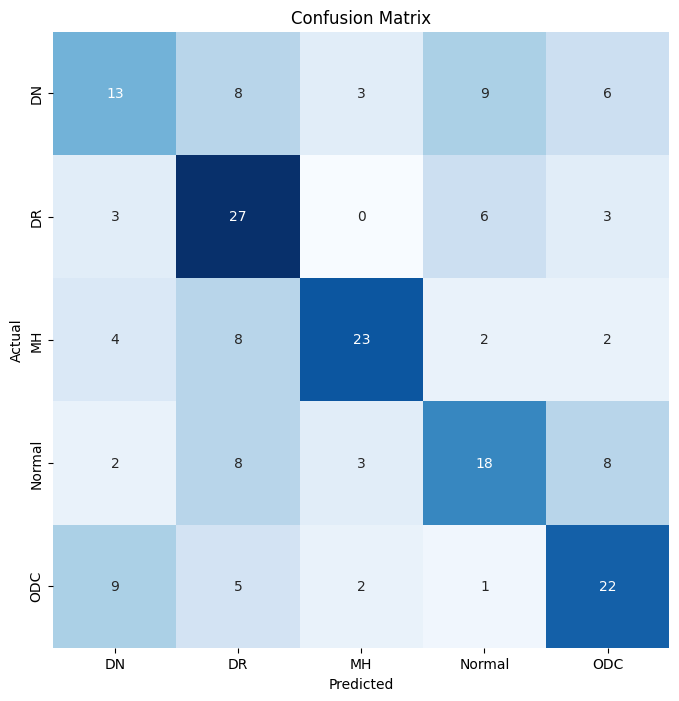

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['DN', 'DR', 'MH', 'Normal', 'ODC']

# Assuming you have a model named 'model1' and data generators 'train_data_generator_gaussian' and 'validation_data_generator_gaussian'

# Function to get true labels and predictions
def get_labels_and_predictions(data_generator, model):
    true_labels = []
    predicted_classes = []

    for i in range(len(data_generator)):
        images, labels = next(data_generator)
        true_labels.extend(np.argmax(labels, axis=1))

        predictions = model.predict(images)
        predicted_classes.extend(np.argmax(predictions, axis=1))

    return np.array(true_labels), np.array(predicted_classes)

# Get true labels and predicted classes for the validation set
true_labels, predicted_classes = get_labels_and_predictions(test_data_generator, new_model)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have true labels and predicted classes
# true_labels: True class labels
# predicted_classes: Predicted class labels

# Define class names
class_names = ['DN', 'DR', 'MH', 'Normal', 'ODC']

# Generate the classification report
report = classification_report(true_labels, predicted_classes, target_names=class_names)

# Print and plot the classification report as a table
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          DN       0.42      0.33      0.37        39
          DR       0.48      0.69      0.57        39
          MH       0.74      0.59      0.66        39
      Normal       0.50      0.46      0.48        39
         ODC       0.54      0.56      0.55        39

    accuracy                           0.53       195
   macro avg       0.54      0.53      0.53       195
weighted avg       0.54      0.53      0.53       195



- We are able to get the same precision, recall and f1_score as train data.

In [19]:
import pandas as pd
data = {
    'Model_name': ['VGG-16 Model'],
    'Test_Accuracy': [0.53],
    'Test_Precision': [0.54],
    'Test_Recall': [0.53],
    'Test_F1_Score': [0.53]
}

df = pd.DataFrame(data)

# Display the DataFrame
df.head(10)

Model_name  Test_Accuracy  Test_Precision  Test_Recall  Test_F1_Score
0  VGG-16 Model           0.53            0.54         0.53           0.53

### Actual Vs Predicted

1/1 [==============================] - 1s 1s/step


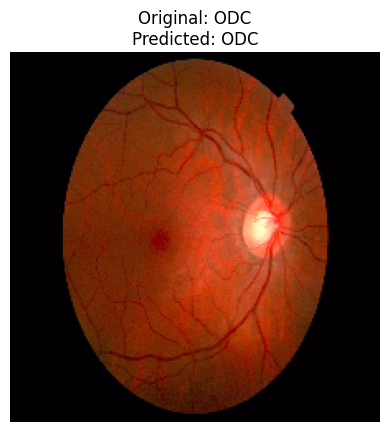

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to plot images with labels
def plot_image_with_labels(image, original_label, predicted_label):
    plt.imshow(image)
    plt.title(f"Original: {original_label}\nPredicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Define the function to display prediction for a specific image
def display_prediction(image_index):
    # Get the class indices from the data generator
    class_indices = test_data_generator.class_indices
    # Create a reverse mapping from index to class name
    index_to_class = {v: k for k, v in class_indices.items()}

    # Get a batch of images and labels from the test data generator
    images, labels = next(test_data_generator)

    # Ensure the index is within the range of the batch size
    if image_index >= len(images):
        print("Index out of range")
        return

    # Extract the image and the true label for the given index
    image = images[image_index]
    true_label = labels[image_index]

    # Get the original class label in human-readable form
    original_class = index_to_class[np.argmax(true_label)]

    # Get the model's prediction for the image
    prediction = new_model.predict(np.expand_dims(image, axis=0))
    predicted_index = np.argmax(prediction, axis=1)[0]
    predicted_class = index_to_class[predicted_index]

    # Plot the image with its original and predicted labels
    plot_image_with_labels(image, original_class, predicted_class)

# Example usage: Display prediction for the first image in the batch
display_prediction(0)

1/1 [==============================] - 0s 18ms/step


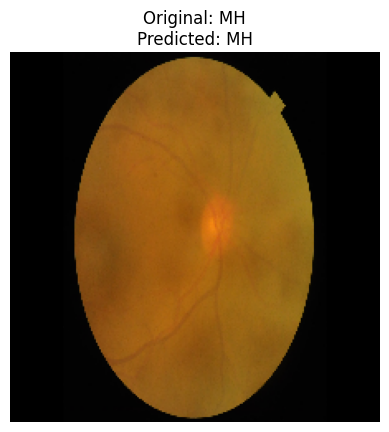

In [ ]:
# Example usage: Display prediction for the first image in the batch
display_prediction(3)

1/1 [==============================] - 0s 31ms/step


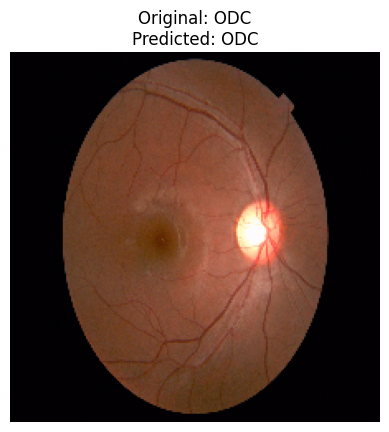

In [ ]:
# Example usage: Display prediction for the first image in the batch
display_prediction(6)

We achieved approximately 80% accuracy using 5 classes. To improve accuracy, we decided to remove the class with the most errors and build a Transfer Learning model with 4 classes to see if accuracy increases.

## Modeling with 4 classes

In [3]:
!unzip '/content/drive/MyDrive/Retinal Disease Classification/Dataset_4_classes.zip'

Archive:  /content/drive/MyDrive/Retinal Disease Classification/Dataset_4_classes.zip
   creating: Dataset_4_classes/cataract/
  inflating: Dataset_4_classes/cataract/_0_4015166.jpg  
  inflating: Dataset_4_classes/cataract/_1_5346540.jpg  
  inflating: Dataset_4_classes/cataract/_1_7703314.jpg  
  inflating: Dataset_4_classes/cataract/_10_3215668.jpg  
  inflating: Dataset_4_classes/cataract/_100_334408.jpg  
  inflating: Dataset_4_classes/cataract/_101_5139882.jpg  
  inflating: Dataset_4_classes/cataract/_101_709333.jpg  
  inflating: Dataset_4_classes/cataract/_102_1024926.jpg  
  inflating: Dataset_4_classes/cataract/_102_3990401.jpg  
  inflating: Dataset_4_classes/cataract/_103_5897328.jpg  
  inflating: Dataset_4_classes/cataract/_104_4607170.jpg  
  inflating: Dataset_4_classes/cataract/_105_5646774.jpg  
  inflating: Dataset_4_classes/cataract/_105_5956883.jpg  
  inflating: Dataset_4_classes/cataract/_106_5284713.jpg  
  inflating: Dataset_4_classes/cataract/_107_5060742.jpg

### Create needed functions

In [4]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [5]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Generate data paths with labels
def generate_filepaths_and_labels(directory):
    all_filepaths = []
    all_labels = []

    subdirs = os.listdir(directory)
    for subdir in subdirs:
        subdir_path = os.path.join(directory, subdir)
        filenames = os.listdir(subdir_path)
        for filename in filenames:
            filepath = os.path.join(subdir_path, filename)
            all_filepaths.append(filepath)
            all_labels.append(subdir)

    return all_filepaths, all_labels

# Concatenate data paths with labels into one dataframe (to later be fitted into the model)
def create_dataframe(filepaths, labels):
    filepath_series = pd.Series(filepaths, name='filepaths')
    label_series = pd.Series(labels, name='labels')
    return pd.concat([filepath_series, label_series], axis=1)

# Split dataframe to train, valid, and test
def split_dataset(data_directory):
    # Generate filepaths and labels
    filepaths, labels = generate_filepaths_and_labels(data_directory)
    dataframe = create_dataframe(filepaths, labels)

    # Split into training and a temporary dataframe
    stratify_labels = dataframe['labels']
    train_df, temp_df = train_test_split(dataframe, train_size=0.8, shuffle=True, random_state=123, stratify=stratify_labels)

    # Split temporary dataframe into validation and test dataframes
    stratify_labels_temp = temp_df['labels']
    valid_df, test_df = train_test_split(temp_df, train_size=0.5, shuffle=True, random_state=123, stratify=stratify_labels_temp)

    return train_df, valid_df, test_df

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_generators(train_dataframe, valid_dataframe, test_dataframe, batch_size):
    '''
    This function takes train, validation, and test dataframes and fits them into image data generators,
    because the model takes data from image data generators. Image data generators convert images into tensors.
    '''

    # Define model parameters
    image_size = (224, 224)
    num_channels = 3  # either BGR or Grayscale
    color_mode = 'rgb'
    image_shape = (image_size[0], image_size[1], num_channels)

    # Recommended: use custom function for test data batch size, else we can use normal batch size.
    test_length = len(test_dataframe)
    test_batch_size = max(sorted([test_length // n for n in range(1, test_length + 1) if test_length % n == 0 and test_length / n <= 80]))
    test_steps = test_length // test_batch_size

    # This function which will be used in image data generator for data augmentation, it just takes the image and returns it again.
    def identity_function(img):
        return img

    train_image_gen = ImageDataGenerator(preprocessing_function=identity_function, horizontal_flip=True)
    test_image_gen = ImageDataGenerator(preprocessing_function=identity_function)

    train_generator = train_image_gen.flow_from_dataframe(
        train_dataframe,
        x_col='filepaths',
        y_col='labels',
        target_size=image_size,
        class_mode='categorical',
        color_mode=color_mode,
        shuffle=True,
        batch_size=batch_size
    )

    valid_generator = test_image_gen.flow_from_dataframe(
        valid_dataframe,
        x_col='filepaths',
        y_col='labels',
        target_size=image_size,
        class_mode='categorical',
        color_mode=color_mode,
        shuffle=True,
        batch_size=batch_size
    )

    # Note: we will use custom test_batch_size, and make shuffle=False
    test_generator = test_image_gen.flow_from_dataframe(
        test_dataframe,
        x_col='filepaths',
        y_col='labels',
        target_size=image_size,
        class_mode='categorical',
        color_mode=color_mode,
        shuffle=False,
        batch_size=test_batch_size
    )

    return train_generator, valid_generator, test_generator

In [7]:
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras

class CustomCallback(keras.callbacks.Callback):
    def __init__(self, model, patience_epochs, stop_patience_epochs, accuracy_threshold, lr_reduction_factor, batches_per_epoch, total_epochs, ask_epoch_start):
        super(CustomCallback, self).__init__()
        self.model = model
        self.patience_epochs = patience_epochs  # Number of epochs without improvement before adjusting learning rate
        self.stop_patience_epochs = stop_patience_epochs  # Number of times to adjust lr without improvement to stop training
        self.accuracy_threshold = accuracy_threshold  # Training accuracy threshold for adjusting lr based on validation loss
        self.lr_reduction_factor = lr_reduction_factor  # Factor to reduce learning rate
        self.batches_per_epoch = batches_per_epoch  # Number of training batches per epoch
        self.total_epochs = total_epochs
        self.ask_epoch_start = ask_epoch_start
        self.initial_ask_epoch = ask_epoch_start  # Save initial ask_epoch_start value to restore if needed

        # Callback variables
        self.lr_reduction_count = 0  # Times lr has been reduced without improvement
        self.lr_stop_count = 0
        self.best_epoch = 1  # Epoch with the lowest loss
        self.initial_lr = float(tf.keras.backend.get_value(model.optimizer.lr))  # Initial learning rate
        self.max_training_accuracy = 0.0  # Highest training accuracy initially
        self.min_validation_loss = np.inf  # Lowest validation loss initially
        self.best_weights = self.model.get_weights()  # Save initial weights
        self.initial_weights = self.model.get_weights()  # Save initial weights for potential restoration

    def on_train_begin(self, logs=None):
        msg = 'Do you want the model to ask for halting training [y/n]?'
        print(msg)
        response = input('')
        if response.lower() == 'y':
            self.allow_user_input = True
        else:
            self.allow_user_input = False

        header = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'Val Loss', 'Val Acc', 'LR', 'Next LR', 'Monitor', '% Improvement', 'Duration')
        print(header)
        self.start_time = time.time()

    def on_train_end(self, logs=None):
        end_time = time.time()
        duration = end_time - self.start_time
        hours = duration // 3600
        minutes = (duration % 3600) // 60
        seconds = duration % 60

        elapsed_time_msg = f'Training elapsed time was {int(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds'
        print(elapsed_time_msg)

        # Restore the model to the best weights
        self.model.set_weights(self.best_weights)

    def on_train_batch_end(self, batch, logs=None):
        # Get batch accuracy and loss
        accuracy = logs.get('accuracy') * 100
        loss = logs.get('loss')

        # Print batch processing information
        batch_msg = '{0:20s}Processing batch {1:} of {2:5s} - Accuracy: {3:5.3f} - Loss: {4:8.5f}'.format(' ', str(batch), str(self.batches_per_epoch), accuracy, loss)
        print(batch_msg, '\r', end='')

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        epoch_end_time = time.time()
        duration = epoch_end_time - self.epoch_start_time

        current_lr = float(tf.keras.backend.get_value(self.model.optimizer.lr))  # Current learning rate
        training_accuracy = logs.get('accuracy')  # Training accuracy
        validation_accuracy = logs.get('val_accuracy')  # Validation accuracy
        training_loss = logs.get('loss')  # Training loss for the epoch
        validation_loss = logs.get('val_loss')  # Validation loss for the epoch

        if training_accuracy < self.accuracy_threshold:
            monitor_metric = 'accuracy'
            improvement_percentage = 0.0 if epoch == 0 else (training_accuracy - self.max_training_accuracy) * 100 / self.max_training_accuracy

            if training_accuracy > self.max_training_accuracy:
                self.max_training_accuracy = training_accuracy
                self.best_weights = self.model.get_weights()
                self.lr_reduction_count = 0
                self.lr_stop_count = 0
                if validation_loss < self.min_validation_loss:
                    self.min_validation_loss = validation_loss
                self.best_epoch = epoch + 1
            else:
                if self.lr_reduction_count >= self.patience_epochs - 1:
                    current_lr *= self.lr_reduction_factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, current_lr)
                    self.lr_reduction_count = 0
                    self.lr_stop_count += 1
                    if validation_loss < self.min_validation_loss:
                        self.min_validation_loss = validation_loss
                else:
                    self.lr_reduction_count += 1
        else:
            monitor_metric = 'val_loss'
            improvement_percentage = 0.0 if epoch == 0 else (self.min_validation_loss - validation_loss) * 100 / self.min_validation_loss

            if validation_loss < self.min_validation_loss:
                self.min_validation_loss = validation_loss
                self.best_weights = self.model.get_weights()
                self.lr_reduction_count = 0
                self.lr_stop_count = 0
                self.best_epoch = epoch + 1
            else:
                if self.lr_reduction_count >= self.patience_epochs - 1:
                    current_lr *= self.lr_reduction_factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, current_lr)
                    self.lr_stop_count += 1
                    self.lr_reduction_count = 0
                else:
                    self.lr_reduction_count += 1

                if training_accuracy > self.max_training_accuracy:
                    self.max_training_accuracy = training_accuracy

        epoch_msg = f'{str(epoch + 1):^3s}/{str(self.total_epochs):4s} {training_loss:^9.3f}{training_accuracy * 100:^9.3f}{validation_loss:^9.5f}{validation_accuracy * 100:^9.3f}{current_lr:^9.5f}{current_lr:^9.5f}{monitor_metric:^11s}{improvement_percentage:^10.2f}{duration:^8.2f}'
        print(epoch_msg)

        if self.lr_stop_count > self.stop_patience_epochs - 1:
            halt_msg = f'Training has been halted at epoch {epoch + 1} after {self.stop_patience_epochs} adjustments of learning rate with no improvement'
            print(halt_msg)
            self.model.stop_training = True
        else:
            if self.ask_epoch_start is not None and self.allow_user_input:
                if epoch + 1 >= self.ask_epoch_start:
                    user_input_msg = 'Enter H to halt training or an integer for number of epochs to run then ask again'
                    print(user_input_msg)

                    user_input = input('')
                    if user_input.lower() == 'h':
                        halt_msg = f'Training has been halted at epoch {epoch + 1} due to user input'
                        print(halt_msg)
                        self.model.stop_training = True
                    else:
                        try:
                            additional_epochs = int(user_input)
                            self.ask_epoch_start += additional_epochs
                            continue_msg = f'Training will continue until epoch {str(self.ask_epoch_start)}'
                            print(continue_msg)
                            header = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'Val Loss', 'Val Acc', 'LR', 'Next LR', 'Monitor', '% Improvement', 'Duration')
                            print(header)
                        except ValueError:
                            print('Invalid input')

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_history(history):
    '''
    This function takes the training history and plots the accuracy and loss over epochs,
    highlighting the best epoch for both metrics.
    '''

    # Extract metrics from history
    training_accuracy = history.history['accuracy']
    training_loss = history.history['loss']
    validation_accuracy = history.history['val_accuracy']
    validation_loss = history.history['val_loss']

    # Identify the best epochs
    best_loss_index = np.argmin(validation_loss)
    lowest_validation_loss = validation_loss[best_loss_index]
    best_accuracy_index = np.argmax(validation_accuracy)
    highest_validation_accuracy = validation_accuracy[best_accuracy_index]

    # Create a list of epoch numbers
    epochs = [i + 1 for i in range(len(training_accuracy))]
    loss_label = f'Best epoch = {best_loss_index + 1}'
    accuracy_label = f'Best epoch = {best_accuracy_index + 1}'

    # Plot training history
    plt.figure(figsize=(20, 8))
    plt.style.use('fivethirtyeight')

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, training_loss, 'r', label='Training Loss')
    plt.plot(epochs, validation_loss, 'g', label='Validation Loss')
    plt.scatter(best_loss_index + 1, lowest_validation_loss, s=150, c='blue', label=loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, training_accuracy, 'r', label='Training Accuracy')
    plt.plot(epochs, validation_accuracy, 'g', label='Validation Accuracy')
    plt.scatter(best_accuracy_index + 1, highest_validation_accuracy, s=150, c='blue', label=accuracy_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [35]:
def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
	'''
	This function plot confusion matrix method from sklearn package.
	'''

	plt.figure(figsize= (10, 10))
	plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
	plt.title(title)
	plt.colorbar()

	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation= 45)
	plt.yticks(tick_marks, classes)

	if normalize:
		cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
		print('Normalized Confusion Matrix')

	else:
		print('Confusion Matrix, Without Normalization')

	print(cm)

	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

	plt.tight_layout()
	plt.ylabel('True Label')
	plt.xlabel('Predicted Label')

### Model Structure

#### Start Reading Dataset

In [10]:
data_dir = '/content/Dataset_4_classes'

try:
    # Get splitted data
    train_df, valid_df, test_df = split_dataset(data_dir)

    # Get Generators
    batch_size = 40
    train_gen, valid_gen, test_gen = create_generators(train_df, valid_df, test_df, batch_size)

except:
    print('Invalid Input')

Found 3373 validated image filenames belonging to 4 classes.
Found 422 validated image filenames belonging to 4 classes.
Found 422 validated image filenames belonging to 4 classes.


In [11]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                         

In [20]:
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras

class CustomCallback(keras.callbacks.Callback):
    def __init__(self, model, patience_epochs, stop_patience_epochs, accuracy_threshold, lr_reduction_factor, batches_per_epoch, total_epochs, ask_epoch_start):
        super(CustomCallback, self).__init__()
        self.model = model
        self.patience_epochs = patience_epochs  # Number of epochs without improvement before adjusting learning rate
        self.stop_patience_epochs = stop_patience_epochs  # Number of times to adjust lr without improvement to stop training
        self.accuracy_threshold = accuracy_threshold  # Training accuracy threshold for adjusting lr based on validation loss
        self.lr_reduction_factor = lr_reduction_factor  # Factor to reduce learning rate
        self.batches_per_epoch = batches_per_epoch  # Number of training batches per epoch
        self.total_epochs = total_epochs
        self.ask_epoch_start = ask_epoch_start
        self.initial_ask_epoch = ask_epoch_start  # Save initial ask_epoch_start value to restore if needed

        # Callback variables
        self.lr_reduction_count = 0  # Times lr has been reduced without improvement
        self.lr_stop_count = 0
        self.best_epoch = 1  # Epoch with the lowest loss
        self.initial_lr = float(tf.keras.backend.get_value(model.optimizer.lr))  # Initial learning rate
        self.max_training_accuracy = 0.0  # Highest training accuracy initially
        self.min_validation_loss = np.inf  # Lowest validation loss initially
        self.best_weights = self.model.get_weights()  # Save initial weights
        self.initial_weights = self.model.get_weights()  # Save initial weights for potential restoration

    def on_train_begin(self, logs=None):
        msg = 'Do you want the model to ask for halting training [y/n]?'
        print(msg)
        response = input('')
        if response.lower() == 'y':
            self.allow_user_input = True
        else:
            self.allow_user_input = False

        header = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'Val Loss', 'Val Acc', 'LR', 'Next LR', 'Monitor', '% Improvement', 'Duration')
        print(header)
        self.start_time = time.time()

    def on_train_end(self, logs=None):
        end_time = time.time()
        duration = end_time - self.start_time
        hours = duration // 3600
        minutes = (duration % 3600) // 60
        seconds = duration % 60

        elapsed_time_msg = f'Training elapsed time was {int(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds'
        print(elapsed_time_msg)

        # Restore the model to the best weights
        self.model.set_weights(self.best_weights)

    def on_train_batch_end(self, batch, logs=None):
        # Get batch accuracy and loss
        accuracy = logs.get('accuracy') * 100
        loss = logs.get('loss')

        # Print batch processing information
        batch_msg = '{0:20s}Processing batch {1:} of {2:5s} - Accuracy: {3:5.3f} - Loss: {4:8.5f}'.format(' ', str(batch), str(self.batches_per_epoch), accuracy, loss)
        print(batch_msg, '\r', end='')

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        epoch_end_time = time.time()
        duration = epoch_end_time - self.epoch_start_time

        current_lr = float(tf.keras.backend.get_value(self.model.optimizer.lr))  # Current learning rate
        training_accuracy = logs.get('accuracy')  # Training accuracy
        validation_accuracy = logs.get('val_accuracy')  # Validation accuracy
        training_loss = logs.get('loss')  # Training loss for the epoch
        validation_loss = logs.get('val_loss')  # Validation loss for the epoch

        if training_accuracy < self.accuracy_threshold:
            monitor_metric = 'accuracy'
            improvement_percentage = 0.0 if epoch == 0 else (training_accuracy - self.max_training_accuracy) * 100 / self.max_training_accuracy

            if training_accuracy > self.max_training_accuracy:
                self.max_training_accuracy = training_accuracy
                self.best_weights = self.model.get_weights()
                self.lr_reduction_count = 0
                self.lr_stop_count = 0
                if validation_loss < self.min_validation_loss:
                    self.min_validation_loss = validation_loss
                self.best_epoch = epoch + 1
            else:
                if self.lr_reduction_count >= self.patience_epochs - 1:
                    current_lr *= self.lr_reduction_factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, current_lr)
                    self.lr_reduction_count = 0
                    self.lr_stop_count += 1
                    if validation_loss < self.min_validation_loss:
                        self.min_validation_loss = validation_loss
                else:
                    self.lr_reduction_count += 1
        else:
            monitor_metric = 'val_loss'
            improvement_percentage = 0.0 if epoch == 0 else (self.min_validation_loss - validation_loss) * 100 / self.min_validation_loss

            if validation_loss < self.min_validation_loss:
                self.min_validation_loss = validation_loss
                self.best_weights = self.model.get_weights()
                self.lr_reduction_count = 0
                self.lr_stop_count = 0
                self.best_epoch = epoch + 1
            else:
                if self.lr_reduction_count >= self.patience_epochs - 1:
                    current_lr *= self.lr_reduction_factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, current_lr)
                    self.lr_stop_count += 1
                    self.lr_reduction_count = 0
                else:
                    self.lr_reduction_count += 1

                if training_accuracy > self.max_training_accuracy:
                    self.max_training_accuracy = training_accuracy

        epoch_msg = f'{str(epoch + 1):^3s}/{str(self.total_epochs):4s} {training_loss:^9.3f}{training_accuracy * 100:^9.3f}{validation_loss:^9.5f}{validation_accuracy * 100:^9.3f}{current_lr:^9.5f}{current_lr:^9.5f}{monitor_metric:^11s}{improvement_percentage:^10.2f}{duration:^8.2f}'
        print(epoch_msg)

        if self.lr_stop_count > self.stop_patience_epochs - 1:
            halt_msg = f'Training has been halted at epoch {epoch + 1} after {self.stop_patience_epochs} adjustments of learning rate with no improvement'
            print(halt_msg)
            self.model.stop_training = True
        else:
            if self.ask_epoch_start is not None and self.allow_user_input:
                if epoch + 1 >= self.ask_epoch_start:
                    user_input_msg = 'Enter H to halt training or an integer for number of epochs to run then ask again'
                    print(user_input_msg)

                    user_input = input('')
                    if user_input.lower() == 'h':
                        halt_msg = f'Training has been halted at epoch {epoch + 1} due to user input'
                        print(halt_msg)
                        self.model.stop_training = True
                    else:
                        try:
                            additional_epochs = int(user_input)
                            self.ask_epoch_start += additional_epochs
                            continue_msg = f'Training will continue until epoch {str(self.ask_epoch_start)}'
                            print(continue_msg)
                            header = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'Val Loss', 'Val Acc', 'LR', 'Next LR', 'Monitor', '% Improvement', 'Duration')
                            print(header)
                        except ValueError:
                            print('Invalid input')

# Assuming 'model' is your pre-defined Keras model and 'train_gen' is your data generator

batch_size = 40  # set batch size for training
epochs = 40  # number of all epochs in training
patience_epochs = 1  # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience_epochs = 3  # number of epochs to wait before stopping training if monitored value does not improve
accuracy_threshold = 0.9  # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
lr_reduction_factor = 0.5  # factor to reduce lr by
ask_epoch_start = 5  # number of epochs to run before asking if you want to halt training
batches_per_epoch = int(np.ceil(len(train_gen.labels) / batch_size))  # number of training batches to run per epoch

callbacks = [CustomCallback(model=model, patience_epochs=patience_epochs, stop_patience_epochs=stop_patience_epochs, accuracy_threshold=accuracy_threshold, lr_reduction_factor=lr_reduction_factor, batches_per_epoch=batches_per_epoch, total_epochs=epochs, ask_epoch_start=ask_epoch_start)]

In [21]:
history = model.fit(x= train_gen, epochs= epochs, verbose= 0, callbacks= callbacks,
                    validation_data= valid_gen, validation_steps= None, shuffle= False)

Do you want the model to ask for halting training [y/n]?
y
 Epoch     Loss   Accuracy Val Loss  Val Acc    LR     Next LR  Monitor  % ImprovementDuration
 1 /40     0.418   98.696   0.45566  95.972   0.00100  0.00100  val_loss     0.00    56.73  
 2 /40     0.344   99.170   0.38741  95.972   0.00100  0.00100  val_loss    14.98    56.03  
 3 /40     0.300   99.081   0.36264  96.209   0.00100  0.00100  val_loss     6.39    55.20  
 4 /40     0.267   99.051   0.34024  95.972   0.00100  0.00100  val_loss     6.18    54.81  
 5 /40     0.233   99.348   0.31173  95.735   0.00100  0.00100  val_loss     8.38    57.77  
Enter H to halt training or an integer for number of epochs to run then ask again
30
Training will continue until epoch 35
 Epoch     Loss   Accuracy Val Loss  Val Acc    LR     Next LR  Monitor  % ImprovementDuration
 6 /40     0.212   99.407   0.31687  95.498   0.00050  0.00050  val_loss    -1.65    55.29  
 7 /40     0.198   99.437   0.27117  96.445   0.00050  0.00050  val_lo

In [22]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

 85/211 [===========>..................] - ETA: 45s - loss: 0.1254 - accuracy: 0.9994

 11/211 [>.............................] - ETA: 52s - loss: 0.2347 - accuracy: 0.9645

211/211 [==============================] - 7s 29ms/step - loss: 0.2738 - accuracy: 0.9597
Train Loss:  0.12536661326885223
Train Accuracy:  0.9994070529937744
--------------------
Validation Loss:  0.2347494214773178
Validation Accuracy:  0.9644549489021301
--------------------
Test Loss:  0.2737591564655304
Test Accuracy:  0.9597156643867493


In [25]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

[1 2 2 3 2 1 3 3 0 2 1 3 2 1 3 3 0 2 3 1 3 0 2 1 2 0 2 3 1 2 1 3 3 1 2 2 1
 3 3 3 1 0 2 0 1 3 1 1 3 1 0 3 3 2 1 1 2 0 3 1 2 0 3 1 0 2 0 0 2 1 2 0 1 1
 1 2 2 0 1 1 3 2 0 3 3 3 2 0 2 0 2 2 0 1 2 2 2 1 3 2 3 0 0 2 0 3 0 0 1 2 3
 1 1 3 3 3 0 1 0 3 0 2 2 1 0 3 2 0 0 3 0 3 3 2 0 1 2 1 0 1 1 3 0 0 1 0 3 1
 2 3 1 0 3 3 2 0 2 3 2 1 2 3 3 3 0 0 0 2 0 0 0 3 2 2 2 0 0 2 1 0 1 0 3 2 0
 0 0 1 3 2 0 1 2 3 0 3 1 3 3 2 0 3 1 2 0 3 1 1 1 1 3 0 1 3 0 2 2 0 1 3 0 2
 0 1 0 3 0 2 3 3 3 0 3 2 1 2 2 0 3 0 1 3 1 0 3 1 3 3 3 1 0 3 1 3 2 3 3 0 1
 2 1 1 2 0 0 2 1 3 3 1 2 1 1 0 1 1 0 3 2 1 3 0 3 3 1 3 1 2 2 1 0 2 3 3 1 1
 2 1 3 2 2 2 2 1 3 1 2 1 2 0 0 0 3 3 3 1 2 1 3 3 1 0 3 1 3 0 0 3 0 3 1 0 1
 1 3 0 0 0 1 0 0 1 0 2 2 2 1 3 1 3 1 1 0 1 1 2 1 1 2 0 3 0 1 1 3 2 1 1 3 2
 3 0 3 2 1 2 0 3 2 3 2 1 3 1 1 3 2 1 1 2 1 3 0 2 3 0 0 2 0 3 2 2 0 0 2 1 2
 0 0 0 3 1 3 0 0 3 1 3 1 2 0 2]


In [27]:
classes = ['DN','DR','MH','Normal']
classes

['DN', 'DR', 'MH', 'Normal']

In [28]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

          DN       0.98      0.98      0.98       104
          DR       1.00      1.00      1.00       110
          MH       0.95      0.91      0.93       101
      Normal       0.91      0.94      0.93       107

    accuracy                           0.96       422
   macro avg       0.96      0.96      0.96       422
weighted avg       0.96      0.96      0.96       422



Confusion Matrix, Without Normalization
[[102   0   0   2]
 [  0 110   0   0]
 [  1   0  92   8]
 [  1   0   5 101]]


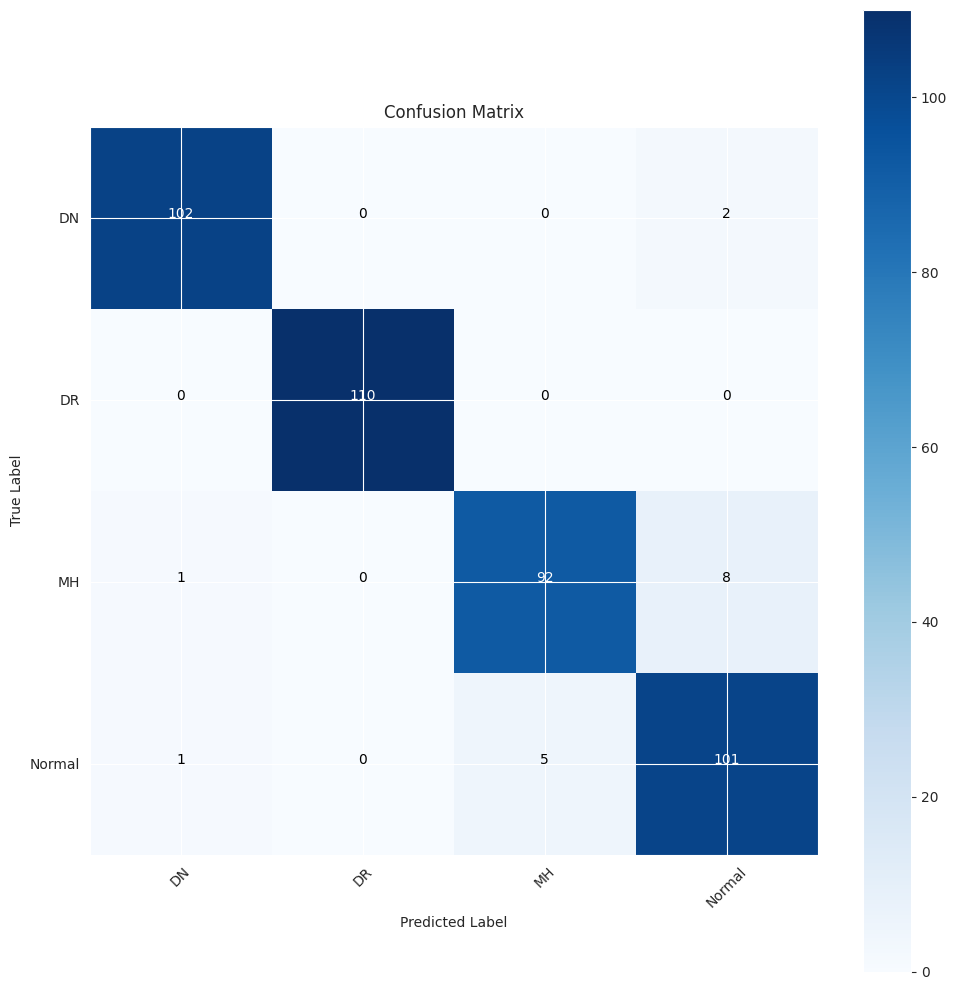

In [37]:
# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, classes= classes, title = 'Confusion Matrix',cmap=plt.cm.Blues)

In [21]:
import pandas as pd
data = {
    'Model_name': ['EfficientNet Model'],
    'Test_Accuracy': [0.96],
    'Test_Precision': [0.96],
    'Test_Recall': [0.96],
    'Test_F1_Score': [0.96]
}

df = pd.DataFrame(data)

# Display the DataFrame
df.head(10)

Model_name  Test_Accuracy  Test_Precision  Test_Recall  \
0  EfficientNet Model           0.96            0.96         0.96   

   Test_F1_Score  
0           0.96

After removing the ODC class with more errors, we achieved approximately 95% accuracy on both the training and test sets. Therefore, we can use this model for the 4 classes.

## Conclusions and Recommendations (5 Class)

### Conclusion

Based on the given problem statement and the performance metrics of different models, it is clear that there is a pressing need for an automated, accurate, and efficient system to classify retinal images for early detection of retinal diseases. Among the models tested, **Transfer_learning_1** demonstrates the best performance with the highest precision, recall, and F1 score, indicating it is the most reliable for this classification task.

### Recommendations

1. **Model Selection**:
   - **Transfer_learning_1** should be selected for deployment due to its superior performance metrics. It provides the best balance between precision and recall, ensuring fewer false positives and false negatives.

2. **Further Improvements**:
   - **Hyperparameter Tuning**: Conduct further hyperparameter tuning on Transfer_learning_1 to potentially enhance its performance even further.
   - **Ensemble Methods**: Consider combining predictions from multiple models using ensemble techniques to potentially improve accuracy and robustness.
   - **Regularization**: Implement regularization techniques such as dropout and L2 regularization to reduce overfitting.

3. **Data Augmentation and Preprocessing**:
   - **Advanced Data Augmentation**: Implement more sophisticated data augmentation techniques (e.g., color jitter, rotation, scaling, elastic transformations) to increase the diversity of the training data.
   - **Preprocessing Pipelines**: Ensure robust preprocessing pipelines to handle variations in image quality, lighting, and other artifacts.

4. **Validation and Testing**:
   - **Cross-Validation**: Use cross-validation to ensure the model's robustness and generalizability across different subsets of the data.
   - **External Validation**: Test the model on external datasets to evaluate its performance in real-world scenarios.

5. **Continuous Learning**:
   - **Active Learning**: Implement active learning techniques to continuously improve the model by periodically retraining it with new data and correcting its predictions.
   - **Feedback Loop**: Establish a feedback loop with healthcare professionals to gather insights and further improve the model’s performance.

### Business Recommendations

1. **Integration into Healthcare Systems**:
   - **Deploy the Model in Clinics and Hospitals**: Integrate the Transfer_learning_1 model into existing healthcare systems to assist ophthalmologists and optometrists in diagnosing retinal diseases more efficiently and accurately.
   - **Telemedicine**: Utilize the model in telemedicine platforms to provide remote diagnosis and treatment recommendations, especially beneficial in underserved areas with limited access to specialized medical expertise.

2. **Training and Education**:
   - **Training Programs for Medical Staff**: Develop training programs to educate healthcare professionals on how to use the automated system effectively, ensuring they can interpret the model’s outputs correctly.
   - **Patient Awareness**: Run awareness campaigns to inform patients about the availability and benefits of automated retinal disease detection, encouraging regular eye check-ups.

3. **Research and Development**:
   - **Collaborative Research**: Partner with research institutions and universities to further refine the model, explore new algorithms, and stay at the forefront of technological advancements in medical imaging.
   - **Funding and Grants**: Seek funding and grants to support ongoing research, development, and deployment of the automated classification system.

4. **Regulatory Compliance**:
   - **Regulatory Approvals**: Ensure the model complies with healthcare regulations and obtain necessary approvals from medical device regulatory bodies such as the FDA or EMA.
   - **Ethical Considerations**: Address ethical considerations related to the use of AI in healthcare, ensuring patient data privacy and secure handling of sensitive medical information.

By following these recommendations and leveraging the Transfer_learning_1 model, healthcare providers can enhance the early detection and treatment of retinal diseases, ultimately improving patient outcomes and reducing the burden on medical professionals.

## Conclusions (4 Class)

After removing the class with more errors, we achieved approximately 95% accuracy on both the training and test sets. Therefore, we can use efficientnetb3 model for the 4 classes as it the accuracy is ~95%

1. **Enhanced Accuracy**: By removing the class with higher error rates, the model's accuracy improved to approximately 95% on both training and test sets, demonstrating a significant enhancement in performance.

2. **Model Selection**: The EfficientNetB3 model has proven to be effective for the classification of retinal diseases when working with four classes, given its ~95% accuracy.

3. **Efficiency in Diagnosis**: The high accuracy of the EfficientNetB3 model suggests that it can be a reliable tool for automated retinal disease detection, potentially reducing the burden on ophthalmologists.

4. **Error Reduction**: Removing the class with more errors has contributed to a more accurate model, which could help in minimizing misdiagnoses and ensuring timely treatment for patients.

5. **Automation Benefits**: Implementing such a model in clinical settings could streamline the diagnosis process, making it faster and more reliable, especially in areas with limited healthcare resources.

6. **Improved Patient Outcomes**: With automated and accurate classification of retinal diseases, patients are likely to receive quicker and more accurate diagnoses, which can improve overall treatment outcomes and address critical health issues more effectively.